# **Taxi Driver Guiding System with deep reinforcement learning**  

Candidate number: 51016, 43687, 39425

## **Abstract**


This project aims to build a guiding system for taxi drivers in Brooklyn, New York, enabling novice drivers to quickly get familiar with the area and improve their earnings, while also helping experienced drivers further optimize their ride-hailing strategies through system suggestions.

We set up a world that uses geospatial data and historical trip records with dynamic congestion. Our main answer is to set up and run three different smart learning agents and compare them—Deep Q-Network (DQN), Proximal Policy Optimization (PPO), and a version of discrete Deep Deterministic Policy Gradient (DDPG)—alongside methods that help us see how good they are. Also, we suggest a new smart group made from experts where the group learns how to control other networks, set up by Bayesian Search (Optuna), meant to mix together the plans made by the main RL experts. This group method tries to use the extra strong sides of different RL ways, possibly getting better robustness or performance.

Final, findings suggest that deep RL can effectively learn taxi guiding policies that adapt to spatiotemporal demand patterns, and that an ensemble of heterogeneous RL algorithms can integrate complementary strategies. This project investigates the efficacy of advanced RL techniques and the proposed MoE agent in learning profitable dispatch policies within a complex urban system. It is to be achieved through rigorous training, evaluation, and state-value visualization.

## **1 Introduction**
Choosing vehicle dispatch strategies is key to the efficient management of modern transportation systems in meeting varying passenger demands under conditions of traffic congestion. This paper develops a suitable environment - based on real data obtained specifically for Brooklyn, New York City - for the application of deep reinforcement learning in autonomous taxi dispatch. The simulation model includes specific aspects of New York City's taxi operation such as defined geographical zones, historical trip record-derived probabilistic passenger demand, fare structures, and a dynamic congestion model that increases travel times between zones as a function of flow.

In fact, developing a dispatch system for taxis is not feasible, as taxi drivers do not receive orders through an online platform like ride-hailing services, and thus are not indirectly managed by a platform's dispatch system. Additionally, developing a multi-agent reinforcement learning dispatch system might require significant computational resources and complex system design.(Xu et al., 2018) In this study, we attempt to simplify the problem by focusing on a single-agent system.  

In everyday life, we observe that experienced taxi drivers tend to know where and when high-value rides are available, and will intentionally move toward these areas after dropping off passengers to optimize their earnings for the day. The concentration of many drivers near airports or train stations is a good example. Novice drivers, however, are unfamiliar with the environment and can only wait in place for the next passenger or casually explore the surrounding area, resulting in potentially lower earnings than skilled drivers.   

This study aims to develop a guiding system that helps novice drivers increase their income through system guiding, even when they are unfamiliar with the environment. Moreover, given our full knowledge of the environment and the ability of reinforcement learning to understand future rewards, we hope to further compare whether this system performs better than experienced drivers who focus on timely high-value ride rewards.  

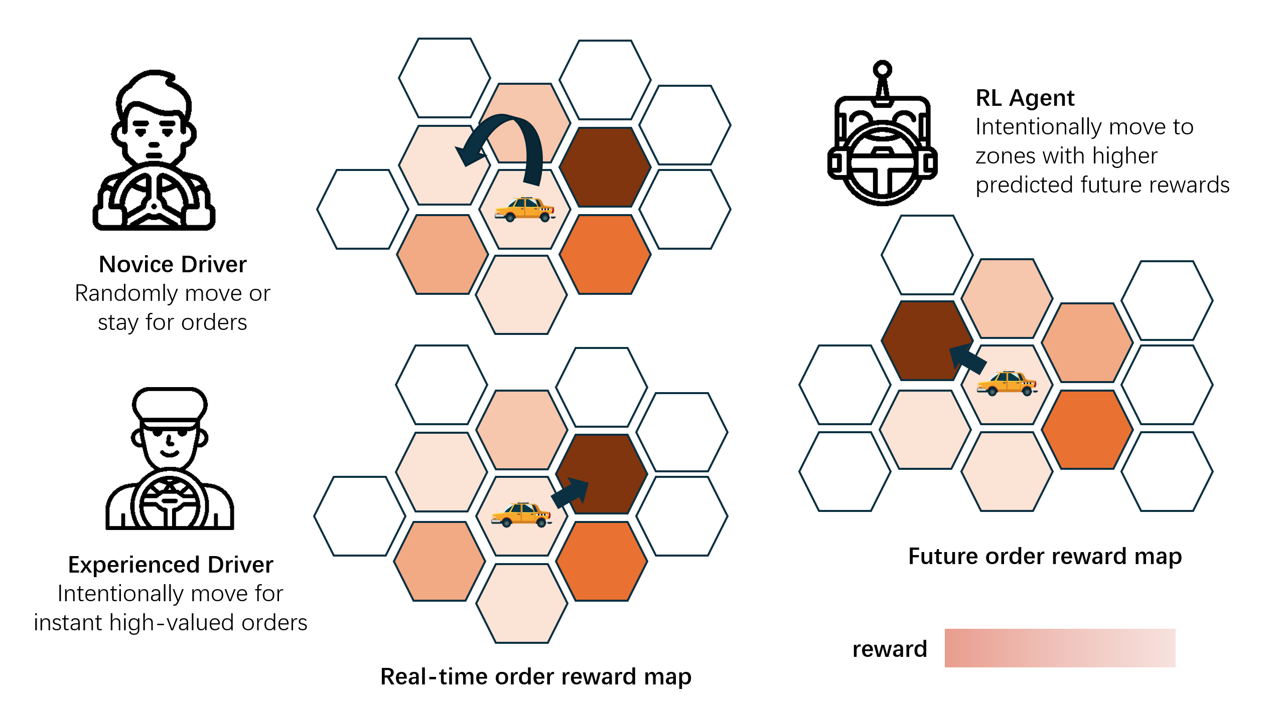


Deep reinforcement learning algorithms have recently been introduced to further extend the already broad applicability of reinforcement learning to the development of dispatching rules. For this paper, several state-of-the-art deep reinforcement learning algorithms were implemented and compared: Deep Q-Network (DQN) (Mnih et al. 2015), the first of these that achieved substantial success in discrete action spaces and has since become a fundamental value-based method; Proximal Policy Optimization (PPO) (Schulman et al. 2017), a very recent policy gradient method that has proven instrumental in increasing the stability of such algorithms; and Deep Deterministic Policy Gradient (DDPG) (Lillicrap et al. 2016), where the combination of the actor-critic architecture and the off-policy gradient-based approach tries to adapt the algorithm to discrete action spaces. We also proposed and evaluated a new Mixture-of-Experts (MoE) ensemble agent because we suspect that very different algorithms can be very strong in different aspects (Jacobs et al. 1991; Masoudnia and Ebrahimpour 2014). This MoE architecture uses a learnable gating network that combines the outputs of the DQN, PPO, and DDPG expert agents. It may dynamically choose the right approach for different situations, something that has been explored in different reinforcement learning (RL) contexts. The rest of the paper Application of RL to ride-sourcing dispatch is an active area of research.

This projectt thoroughly compares the performance of implemented RL agents (DQN, PPO, DDPG, MoE) and standard baselines (Greedy, Random) in the Brooklyn taxi environment. Several metrics directly computed from the simulation results, such as the reward per episode, reward per time step, and spatial zone-based learned state-value functions, were used to measure performance. The main novelty introduced is the fact that the up-to-date deep RL methods, including the unique architecture of MoE, were thoroughly evaluated in a realistic and specific simulation setting that was related to Brooklyn. This permits a close look at learned policy behaviours and any trade-offs that may impinge on performance between the different versions of these high-end methods for intelligent taxi dispatch.

## **2 Literature Review**


### 2.1 **Basic Concept**
Reinforcement learning offers formal frameworks for sequential decision-making under uncertainty; thus, the taxi dispatch problem is framed in terms of a Markov Decision Process (MDP). The agent interacts with the environment in discrete time steps observations about the current state, which is the time and location, and chooses an action (which zone to go to) so as to maximize expected cumulative reward over time. The state-value function represents the expected return from state under a given policy, and the action-value function represents the expected return from taking action in state \$s\$ and then following the policy thereafter. The agent’s goal is to learn an optimal policy that maximizes these long-term rewards (Sutton & Barto, 2018).

---

### 2.2 **Deep Q-Network (DQN)**
DQN is a value-based off-policy algorithm that uses a deep neural network to approximate the Q-function. Originally demonstrated by Mnih et al. (2015) to achieve human-level performance on Atari games, DQN learns by iteratively updating network parameters to minimize the Bellman error between the predicted Q(s,a) and a target. Key techniques include experience replay and target networks to stabilize learning. In our context, the DQN agent treats each dispatch decision as a discrete action and learns Q(s,a) for state = (time, zone) and actions = possible next zones. Over time, it converges toward a policy that greedily selects the zone with highest learned Q-value.

---

### 2.3 **Proximal Policy Optimization (PPO)**
PPO is a policy-gradient, actor-critic method that directly optimizes the policy and a value function via gradient ascent on expected reward. PPO improves training stability by using a clipped surrogate objective that penalizes large policy updates, a simplified alternative to Trust Region Policy Optimization. This enables multiple epochs of minibatch updates on each batch of experience, improving sample efficiency. PPO has empirically proven itself to be better than the earlier policy gradient algorithms in continuous control benchmarks whilst staying robust and simple. In this project, the PPO agent uses an actor network to output a probability distribution over discrete zone-actions and a critic network to estimate state value, akin to Schulman et al. (2017). The clipped objective helps constrain policy changes which in our non-stationary demand setting is tactical as it may help prevent performance collapse.

---

### 2.4 **Deep Deterministic Policy Gradient (DDPG)**
DDPG is an actor-critic algorithm for continuous action spaces that combines Q-learning with policy gradients (Silver et al., 2014; Lillicrap et al., 2016). It uses a parameterized actor to select actions and a critic to critique them, learning both concurrently. It is model-free and off-policy, utilizing experience replay for sample efficiency and target networks, similar to DQN, to stabilize learning and mitigate the overestimation of action values . Applying DDPG to discrete action problems, such as vehicle dispatching, typically requires specific adaptations.

---

### 2.5 **Ensemble and Mixture-of-Experts in RL**
The challenges of stability, exploration, and non-stationarity can best be addressed by combining multiple RL agents. Prior work already demonstrated how ensembles of Q-learners can reduce value estimation bias and improve exploration. An example is the deep ensemble multi-agent RL method for air traffic control developed by Ghosh et al. (2021), which is arbitrating between a local model-based policy and a global deep RL policy to be of better performance when in the approach of this more complex domain. This shows that ensemble methods can combine different algorithm strengths for the mitigation of high-dimensional decision problems.

The ensemble architecture of Mixture-of-Experts (MoE) uses a gating function to dynamically weight the contributions of multiple expert models (Jacobs et al., 1991; Masoudnia & Ebrahimpour, 2014). In this type of ensemble architecture, every expert specializes in particular parts of the input space, and a gating network learns to *route* a given input to the most appropriate experts. Recent work has begun applying MoE to Deep RL for instance, Ren et al. (2021) proposed a probabilistic MoE to handle multi-modal policy behaviors efficiently in DRL.  

## **3 Methdology**

### **3.1 Data Source and EDA**

#### **(1) Data Source and description**
The dataset used in this study comes from the NYC Taxi and Limousine Commission (TLC) and includes trip records from New York City's yellow and green taxis. It captures pickup and drop-off dates/times, pickup and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. This dataset was provided to the TLC by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP), capturing the intricate details of taxi trips and providing a detailed view of the urban transportation mode of taxi travel. The original dataset is in PARQUET format, and a 2019 version has been organized into CSV format on the data science competition platform Kaggle. This study is based on that data. The dataset also includes shapefiles for New York City’s boroughs, which facilitate the subsequent construction of spatial join tables, visualizations, and lookup tables for districts and IDs.

#### **(2) Data Filtering and Preprocessing Logic**

To focus on dispatch optimization in the Brooklyn area, we retained only those trip records in which both the pickup and drop-off locations were within Brooklyn. From the trip data, we extracted the following temporal features: Date (daily granularity): used for daily-level aggregation and statistical analysis; Time step (10-minute granularity): each day was divided into 144 consecutive 10-minute intervals to enable temporal modeling in the reinforcement learning environment.  

We removed abnormal transactions with fare amounts less than or equal to 0 dollar or greater than or equal to 200 dollars, and retained only valid trips for price estimation. Based on pickup and drop-off location pairs, we then computed the average fare and probability matrix across all origin-destination pairs. This matrix serves as a foundation for estimating the expected reward in the reinforcement learning framework, and the probabilty of random orders in the environment building. 

To characterize the dynamic demand across time steps in Brooklyn, we computed the pickup count for each zone at every time step, and the drop-off count for each zone at the previous time step (to approximate potential future inflow via temporal lagging). We combined these statistics using a weighted sum (current pickups + 0.5 × next-step drop-offs) to construct a weighted demand intensity matrix. This matrix was normalized within each time step to yield a pickup probability distribution over regions, which can be used for policy simulation or state space modeling.  

Lastly, based on the spatial geometry of taxi zones, we determined whether any two zones in Brooklyn were geographically adjacent (i.e., shared a boundary). This allowed us to construct an adjacency dictionary, recording for each zone the list of neighboring zones it can move to. This adjacency structure defines the action space available to the agent in our reinforcement learning environment.



### **3.2 Experimental Design**

#### **(1)Library Imports and Environment Initialization**
This section brings in all key Python libs needed for the system to work, covering data handling, geospatial analysis, network modeling, machine learning (using PyTorch), and hyperparameter tuning. The main setup comes next: turning off non-important warnings, fixing random seeds for making results reproducible, and self-configuring compute resources (giving first priority to CUDA GPU acceleration when it is available and defaulting to CPU if not).



In [ ]:
# ==== Library Imports and Environment Initialization ====

# !pip install geopandas
# !pip install python-igraph
# !pip install optuna

# ==== Standard Library ====
import warnings
import math
import random
import itertools
import json
from collections import namedtuple, deque
from typing import Tuple, Any, List, Optional

# ==== Data Processing ====
import numpy as np
import pandas as pd

# ==== Geospatial & Graph ====
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import LineString
import igraph as ig

# ==== RL Environment ====
import gym
from gym import spaces

# ==== Deep Learning ====
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.distributions import Categorical

# ==== Hyperparameter Optimization ====
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import SuccessiveHalvingPruner

# ==== Visualization ====
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm, Normalize


# ==== Turn off warnings & Uniform random seeds ====
warnings.filterwarnings('ignore')
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
DEVICE = "cpu"

#### **(2) Agent-Based Taxi Simulation Environment with Dynamic Congestion and Probabilistic Demand**
This agent-based simulation framework models urban taxi dynamics through three key innovations: BPR congestion-responsive travel times in a directed road network (Salanova Grau & Estrada Romeu, 2015), taxi routing with spatio-temporal passenger probabilities, and multi-component fare systems. Extending prior taxi simulations. It integrates Bernhardt's (2007) complex adaptive systems approach with enhanced agent interactions to analyze fleet-congestion relationships.

---

##### **Initialization**
- **Data inputs:** Paths to the shapefile of zones and the CSV of historical trips.  
- **Congestion model parameters:** $\alpha$, $\beta$ (BPR function) and flow decay factor.  
- **Reward weights:** $\beta_0$, $\beta_1$ (cruise penalty), $\beta_3$ (service reward).

---

##### **Zone & Adjacency Construction**
- Load and buffer zone geometries, filter to target borough + adjacent zones.  
- Compute zone centroids and map Location IDs to contiguous indices.  
- Build neighbor lists via spatial index.

---

##### **Trip Data Preprocessing**  
- **Filter trips:** Valid pickup/dropoff IDs + reasonable fare range.  
- **Discretize time:**  
  $$
  \mathrm{time\_step} = 6 \times \text{hour} + \left\lfloor \frac{\text{minute}}{10} \right\rfloor
  $$  
- **Pickup probability matrix** with temporal smoothing:  
  $$
  w_{t,i} = \text{count}_{t,i} + 0.5 \cdot \text{count}_{t-1,i}, \quad p_{t,i} = \frac{w_{t,i}}{\sum_j w_{t,j}}
  $$

---

##### **State & Action Spaces**  
- **Observation:** $(t,i)$ where  
  $$t \in \{0,\dots,143\}, \quad i \in \{0,\dots,N-1\}$$  
- **Action:** Choose next zone from $N$ discrete options.

---

##### **Road Network & Congestion**  
- **Directed graph:** Vertices = zones, edges = adjacency  
- **Free-flow travel time:**  
  $$
  \tau^0_{ij} = \frac{d_{ij}}{v}
  $$  
- **Congested travel time (BPR):**  
  $$
  \tau_{ij}(f) = \tau^0_{ij} \left( 1 + \alpha \left( \frac{f_{ij}}{c_{ij}} \right)^\beta \right)
  $$

---

##### **Pricing & Reward**  
- **Fare calculation:**  
  $$
  \text{fare} = \mathrm{flag\_drop} + c_d \min(D, d_{\text{thresh}}) + c_t \min(T, t_{\text{thresh}})
  $$  
- **Per-step reward:**  
  $$
  r = \beta_0 + \beta_1 \frac{T_{\text{cruise}}}{60} + \mathbf{1}_{\{\text{pickup}\}} \left[ \beta_3 \frac{T_{\text{service}}}{60} + \text{fare} \right]
  $$


In [ ]:
# ==== Agent-Based Taxi Simulation Environment with Dynamic Congestion and Probabilistic Demand ====

class TaxiEnv(gym.Env):
    metadata = {"render.modes": ["human"]}

    # ==== Initialization ====
    def __init__(
        self,
        shapefile="taxi_zones.shp",
        trips_csv="filtered_brooklyn_trips.csv",
        borough="Brooklyn",
        seed=None,
        avg_speed_kmh=30,
        alpha=0.15,
        beta=4.0,
        flow_decay=0.9,
        pricing_params=None,
        reward_beta0: float = 0.0,
        reward_beta1: float = -1.0,
        reward_beta3: float = 1.0,
    ):
        self.shapefile = shapefile
        self.borough   = borough
        super().__init__()
        self.rng = np.random.default_rng(seed)
        self.reward_beta0 = reward_beta0
        self.reward_beta1 = reward_beta1
        self.reward_beta3 = reward_beta3
        self.alpha = alpha
        self.beta = beta
        self.flow_decay = flow_decay

        # load and filter zone geometries
        gdf = gpd.read_file(shapefile)
        gdf['geometry'] = gdf['geometry'].buffer(0)

        target_gdf = gdf[gdf["borough"] == borough].copy()
        target_zone_ids = set(target_gdf["LocationID"].astype(int))

        target_gdf = target_gdf[target_gdf.geometry.is_valid]
        target_boundary = unary_union(target_gdf['geometry'])

        adjacent_zones_gdf = gdf[
            (gdf["borough"] != borough) &
            (gdf.geometry.is_valid) &
            (gdf.geometry.intersects(target_boundary))
        ].copy()
        adjacent_zone_ids = set(adjacent_zones_gdf["LocationID"].astype(int))

        expanded_zone_ids = target_zone_ids.union(adjacent_zone_ids)
        bdf = gdf[gdf["LocationID"].isin(expanded_zone_ids)].copy()
        bdf["centroid"] = bdf.geometry.centroid
        bdf['LocationID'] = bdf['LocationID'].astype(int)

        self.zones = sorted(list(expanded_zone_ids))
        self.zone_to_idx = {z: i for i, z in enumerate(self.zones)}
        self.idx_to_zone = {i: z for z, i in self.zone_to_idx.items()}
        self.num_zones = len(self.zones)
        self.centroids = {self.zone_to_idx[r.LocationID]: r.centroid for _, r in bdf.iterrows() if r.LocationID in self.zone_to_idx}

        # build neighbor lists
        neighbors = {z: [] for z in self.zones}
        bdf_sindex = bdf.sindex
        for i, r1 in bdf.iterrows():
            zone1_id = r1.LocationID
            possible_matches_index = list(bdf_sindex.intersection(r1.geometry.bounds))
            possible_matches = bdf.iloc[possible_matches_index]
            intersecting_matches = possible_matches[possible_matches.geometry.intersects(r1.geometry)]
            for j, r2 in intersecting_matches.iterrows():
                 zone2_id = r2.LocationID
                 if zone1_id != zone2_id: neighbors[zone1_id].append(zone2_id)
            neighbors[zone1_id].append(zone1_id)

        self.neighbors = neighbors
        self.neighbors_idx = {}
        for z, nbrs in neighbors.items():
             valid_nbr_indices = []
             for nz in nbrs:
                 if nz in self.zone_to_idx: valid_nbr_indices.append(self.zone_to_idx[nz])
             self.neighbors_idx[self.zone_to_idx[z]] = sorted(list(set(valid_nbr_indices)))

        # process trip data
        df = pd.read_csv(
            trips_csv,
            usecols=["tpep_pickup_datetime", "PULocationID", "DOLocationID", "fare_amount"],
            parse_dates=["tpep_pickup_datetime"],
        )
        df['PULocationID'] = pd.to_numeric(df['PULocationID'], errors='coerce')
        df['DOLocationID'] = pd.to_numeric(df['DOLocationID'], errors='coerce')
        df.dropna(subset=['PULocationID', 'DOLocationID'], inplace=True)
        df['PULocationID'] = df['PULocationID'].astype(int)
        df['DOLocationID'] = df['DOLocationID'].astype(int)

        df = df[df['PULocationID'].isin(self.zones) & df['DOLocationID'].isin(self.zones)].copy()
        df["time_step"] = df["tpep_pickup_datetime"].dt.hour * 6 + df["tpep_pickup_datetime"].dt.minute // 10
        valid = df[(df.fare_amount > 0) & (df.fare_amount < 200)].copy()

        fm = valid.groupby(["PULocationID", "DOLocationID"])["fare_amount"].mean().unstack()

        # average fares and pickup probabilities
        self.avg_fare = fm.reindex(index=self.zones, columns=self.zones, fill_value=0)

        valid["prev"] = (valid["time_step"] - 1 + 144) % 144
        pu = valid.groupby(["time_step", "PULocationID"]).size().unstack(fill_value=0)
        do = valid.groupby(["prev", "DOLocationID"]).size().unstack(fill_value=0)
        idx_ts = pd.Index(range(144), name="time_step")
        pu = pu.reindex(index=idx_ts, columns=self.zones, fill_value=0)
        do = do.reindex(index=idx_ts, columns=self.zones, fill_value=0)
        wt = pu + 0.5 * do
        wt_sum = wt.sum(axis=1)
        prob = wt.div(wt_sum + 1e-9, axis=0).fillna(0)
        self.pickup_prob = prob.reindex(index=idx_ts, columns=self.zones, fill_value=0)
        self.pickup_prob_array = self.pickup_prob.to_numpy().astype(np.float32)

        # origin–destination density fallback
        pu_counts = valid["PULocationID"].value_counts().reindex(self.zones, fill_value=0)
        do_counts = valid["DOLocationID"].value_counts().reindex(self.zones, fill_value=0)
        f_sum = pu_counts.sum(); g_sum = do_counts.sum()
        f = pu_counts / f_sum if f_sum > 0 else pd.Series(1/self.num_zones, index=self.zones)
        g = do_counts / g_sum if g_sum > 0 else pd.Series(1/self.num_zones, index=self.zones)
        od = np.outer(f.values, g.values)
        od_sum = od.sum()
        self.od_density = od / od_sum if od_sum > 0 else np.full((self.num_zones, self.num_zones), 1.0/(self.num_zones**2))

        # spaces and graph setup
        self.num_steps = 144
        self.observation_space = spaces.Tuple((
             spaces.Discrete(self.num_steps),
             spaces.Discrete(self.num_zones)
        ))
        self.action_space = spaces.Discrete(self.num_zones)
        self.speed = avg_speed_kmh * 1000 / 3600.0

        # build directed road graph
        self.road_graph = ig.Graph(directed=True)
        self.road_graph.add_vertices(self.num_zones)
        self.road_graph.vs["zone_id"] = self.zones
        self.road_graph.vs["centroid"] = [self.centroids.get(i, None) for i in range(self.num_zones)]

        collector_thresh, arterial_thresh = 500, 1000
        edges_to_add = []
        edge_attrs = {"length": [], "free_flow_time": [], "capacity": [], "flow": [], "travel_time": [], "road_type": []}

        for src_idx, nbr_indices in self.neighbors_idx.items():
            if not (0 <= src_idx < self.num_zones and self.road_graph.vs[src_idx]["centroid"] is not None): continue
            r1_centroid = self.road_graph.vs[src_idx]["centroid"]

            for dst_idx in nbr_indices:
                if not (0 <= dst_idx < self.num_zones and self.road_graph.vs[dst_idx]["centroid"] is not None): continue
                if src_idx == dst_idx: continue

                r2_centroid = self.road_graph.vs[dst_idx]["centroid"]
                d = r1_centroid.distance(r2_centroid)
                fft = d / self.speed if self.speed > 0 else float('inf')

                if d >= arterial_thresh: cap_vph, road_type = 2000, "arterial"
                elif d >= collector_thresh: cap_vph, road_type = 1500, "collector"
                else: cap_vph, road_type = 900, "local"
                cap_per_step = max(cap_vph / 6.0, 1e-6)

                edges_to_add.append((src_idx, dst_idx))
                edge_attrs["length"].append(d)
                edge_attrs["free_flow_time"].append(fft)
                edge_attrs["capacity"].append(cap_per_step)
                edge_attrs["flow"].append(0.0)
                edge_attrs["travel_time"].append(fft)
                edge_attrs["road_type"].append(road_type)

        self.road_graph.add_edges(edges_to_add)
        num_added_edges = len(edges_to_add)
        if num_added_edges > 0:
            for attr, values in edge_attrs.items():
                if len(values) == num_added_edges:
                    self.road_graph.es[attr] = values

        # historical counts and pricing
        self.hist_pu = np.zeros((self.num_steps, self.num_zones), dtype=np.float32)
        self.hist_do = np.zeros((self.num_steps, self.num_zones), dtype=np.float32)
        defaults = {"flag_drop": 3.0, "c_d": 1.61/1000, "d_thresh": 1e9, "c_t": 0.50/60, "t_thresh": 1e9}
        pp = {**defaults, **(pricing_params or {})}
        self.flag_drop = pp["flag_drop"]; self.c_d = pp["c_d"]; self.d_thresh = pp["d_thresh"]
        self.c_t = pp["c_t"]; self.t_thresh = pp["t_thresh"]

        self.current_step = 0
        self.current_zone = 0

    # ==== Reset the environment ====
    def reset(self):
        self.current_step = 0
        self.hist_pu.fill(0)
        self.hist_do.fill(0)
        num_edges = len(self.road_graph.es)
        if num_edges > 0:
            self.road_graph.es["flow"] = [0.0] * num_edges
            self.road_graph.es["travel_time"] = list(self.road_graph.es["free_flow_time"])

        initial_probs = self.pickup_prob_array[0, :]
        prob_sum = initial_probs.sum()
        if prob_sum > 0:
             prob_norm = initial_probs / prob_sum
             self.current_zone = self.rng.choice(self.num_zones, p=prob_norm)
        else:
             self.current_zone = self.rng.integers(self.num_zones)
        return (self.current_step, self.current_zone)

    # ==== Take one simulation step ====
    def step(self, action):
        origin_idx = self.current_zone
        target_idx = int(action)
        self.update_congestion()

        # enforce valid move
        valid_neighbors = self.neighbors_idx.get(origin_idx, [origin_idx])
        if not valid_neighbors:
            valid_neighbors = [origin_idx]
        if target_idx not in valid_neighbors:
            target_idx = self.rng.choice(valid_neighbors)

        # cruising to target
        cruise_time = 0.0
        cruise_dist = 0.0
        if origin_idx != target_idx:
            current_travel_times = self.road_graph.es["travel_time"]
            paths = self.road_graph.get_shortest_paths(
                origin_idx, to=target_idx,
                weights=current_travel_times, output="epath"
            )
            if paths and paths[0]:
                path_edges = paths[0]
                flows = list(self.road_graph.es["flow"])
                for eid in path_edges:
                    edge = self.road_graph.es[eid]
                    cruise_time += edge["travel_time"]
                    cruise_dist += edge["length"]
                    flows[eid] += 1
                self.road_graph.es["flow"] = flows
            else:
                src = self.road_graph.vs[origin_idx]["centroid"]
                dst = self.road_graph.vs[target_idx]["centroid"]
                d = src.distance(dst)
                cruise_dist = d
                cruise_time = d / self.speed if self.speed > 0 else 600.0

        self.current_zone = target_idx
        reward = self.reward_beta0 + self.reward_beta1 * (cruise_time/60)

        # attempt passenger pickup
        pickup = False
        if self.current_step < self.num_steps:
            p = self.pickup_prob_array[self.current_step, self.current_zone]
            pickup = self.rng.random() < p

        if self.current_step < self.num_steps:
            self.hist_pu[self.current_step, self.current_zone] += int(pickup)

        service_time = 0.0
        paid_dist = 0.0

        if pickup:
            # choose destination based on avg fare or OD fallback
            valid_dest = None
            src_zone_id = self.idx_to_zone[self.current_zone]
            try:
                fr = self.avg_fare.loc[src_zone_id]
                if fr.sum() > 0:
                    valid_dest = fr.values / fr.sum()
                else:
                    odr = self.od_density[self.current_zone]
                    if odr.sum() > 0:
                        valid_dest = odr / odr.sum()
            except KeyError:
                pass

            if valid_dest is not None:
                vd = np.maximum(valid_dest, 0)
                if vd.sum() > 0:
                    vd /= vd.sum()
                    dest_idx = self.rng.choice(self.num_zones, p=vd)
                else:
                    dest_idx = self.rng.integers(self.num_zones)
            else:
                dest_idx = self.rng.integers(self.num_zones)

            # drive to destination
            if self.current_zone != dest_idx:
                current_travel_times = self.road_graph.es["travel_time"]
                paths = self.road_graph.get_shortest_paths(
                    self.current_zone, to=dest_idx,
                    weights=current_travel_times, output="epath"
                )
                if paths and paths[0]:
                    flows = list(self.road_graph.es["flow"])
                    for eid in paths[0]:
                        edge = self.road_graph.es[eid]
                        service_time += edge["travel_time"]
                        paid_dist += edge["length"]
                        flows[eid] += 1
                    self.road_graph.es["flow"] = flows
                else:
                    src = self.road_graph.vs[self.current_zone]["centroid"]
                    dst = self.road_graph.vs[dest_idx]["centroid"]
                    d = src.distance(dst)
                    paid_dist = d
                    service_time = d / self.speed if self.speed > 0 else 600.0

                if self.current_step < self.num_steps:
                    self.hist_do[self.current_step, dest_idx] += 1

            ## compute fare and reward
            dist_charge = self.c_d * min(paid_dist, self.d_thresh)
            time_charge = self.c_t * min(service_time, self.t_thresh)
            fare = self.flag_drop + dist_charge + time_charge
            reward += self.reward_beta3 * (service_time/ 60.0) + fare

            self.current_zone = dest_idx

        # advance time
        elapsed = cruise_time + service_time
        delta_steps = max(1, math.ceil(elapsed / 600.0))
        self.current_step += delta_steps
        done = self.current_step >= self.num_steps
        next_state = (self.current_step, self.current_zone)
        return next_state, reward, done, {}

    # ==== Update edge travel times based on congestion ====
    def update_congestion(self):
        edges = self.road_graph.es
        if not edges: return
        fft = np.array(edges["free_flow_time"], dtype=np.float32)
        flows = np.array(edges["flow"], dtype=np.float32)
        caps = np.array(edges["capacity"], dtype=np.float32)
        fft = np.nan_to_num(fft, nan=3600.0, posinf=3600.0, neginf=0.0)
        flows *= self.flow_decay
        flows = np.clip(flows, 0.0, None)
        caps = np.maximum(caps, 1e-6)
        ratios = np.clip(flows / caps, 0.0, 10.0)
        with np.errstate(over='ignore', invalid='ignore'):
             bpr_power_term = np.power(ratios, self.beta)
        bpr_power_term = np.nan_to_num(bpr_power_term, nan=0.0, posinf=10.0**self.beta, neginf=0.0)
        travel_times = fft * (1.0 + self.alpha * bpr_power_term)
        travel_times = np.nan_to_num(travel_times, nan=3600.0, posinf=3600.0, neginf=0.0)
        travel_times = np.maximum(travel_times, fft)
        travel_times = np.maximum(travel_times, 0.1)

        edges["flow"] = flows.tolist()
        edges["travel_time"] = travel_times.tolist()

#### **(3) GreedyBaseline & RandomBaseline Agents**
To compare our guiding system with human drivers, we introduce two benchmark agents for simulation. We use **GreedyBaseline** to simulate experienced drivers. The GreedyBaseline employs a heuristic: it stays in the current zone if the passenger pickup probability surpasses a threshold, otherwise it moves to the neighboring zone offering the highest pre-calculated average fare. In contrast, we use **RandomBaseline** to simulate novice drivers. The RandomBaseline acts randomly, simply selecting any valid neighboring zone as its next move.

---

##### **GreedyBaseline**

- **Initialization**  
  - $\theta$ : probability threshold for deciding whether to stay in the current zone.  
  - Pre-compute the average fare for each zone $z$:
  $$
  \bar f_z \;=\;
  \begin{cases}
    \dfrac{1}{|\mathcal{J}_z|}\sum_{j\in\mathcal{J}_z} f_{z,j}, & \sum_j f_{z,j} > 0,\\[6pt]
    0, & \text{otherwise},
  \end{cases}
  $$
  where $f_{z,j}$ is the mean fare from zone $z$ to zone $j$, and $\mathcal{J}_z$ is the set of all destination zones.

- **Action selection**  
  Given state $(t, z)$ with pickup probability $p_{t,z}$, the action $a$ is chosen as:
  $$
  a =
  \begin{cases}
    z, & p_{t,z} > \theta,\\[6pt]
    \displaystyle \arg\max_{k \,\in\, \mathcal{N}_z} \bar f_k, & \text{otherwise},
  \end{cases}
  $$
  where $\mathcal{N}_z$ is the set of neighboring zones of $z$.

- **Decay**  
  Placeholder method.

---

##### **RandomBaseline**

- **Initialization**  
  - Store the mapping $\mathcal{N}_z$ of valid moves for each zone index $z$.

- **Action selection**  
  Randomly choose the next zone from neighbors:
  $$
  a \;\sim\; \mathrm{Uniform}(\mathcal{N}_z)
  $$

- **Decay**  
  Placeholder method.


In [ ]:
# ==== GreedyBaseline & RandomBaseline Agents ====

class GreedyBaseline:
    # ==== Initialization ====
    def __init__(self, env, stay_threshold=0.3):
        self.env = env
        self.stay_threshold = stay_threshold
        self.zone_avg_fare = {
            z: (env.avg_fare.loc[z].mean() if env.avg_fare.loc[z].sum() > 0 else 0.0)
            for z in env.zones
        }

    # ==== Action selection ====
    def choose_action(self, state):
        t, zi = state
        cur = self.env.idx_to_zone[zi]
        if self.env.pickup_prob.at[t, cur] > self.stay_threshold:
            return zi
        nbrs = self.env.neighbors[cur]
        best = max(nbrs, key=lambda z: self.zone_avg_fare[z])
        return self.env.zone_to_idx[best]

    # ==== Decay placeholder ====
    def decay(self):
        pass

class RandomBaseline:
    # ==== Initialization ====
    def __init__(self, num_zones, neighbors):
        self.num_zones = num_zones
        self.neighbors = neighbors

    # ==== Action selection ====
    def choose_action(self, state):
        _, zi = state
        return random.choice(self.neighbors[zi])

    # ==== Decay placeholder ====
    def decay(self):
        pass

#### **(4) DQN Agent: Deep Q-Learning with Prioritized Replay for Taxi Guiding**
This Deep Q-Network (DQN) agent addresses the taxi routing problem using value-based reinforcement learning with some modern improvements. Mainly, it uses Prioritized Experience Replay (PER) to make sampling of experience transitions more efficient and an optional Double DQN approach to improve Q-value estimation accuracy (Li et al., 2023). It uses an MLP architecture with Layer Normalization for the Q-function approximations over state features. Such architecture extends the vanilla DQN, empowering it with advanced RL techniques to learn good decision-making policies at the individual taxi agent level in the simulation setting (Li et al., 2023).


---

##### **State Encoding**  
Map state $(t, z)$ to a 4‑dimensional feature vector
$$
x =
\begin{bmatrix}
  p_{t,z} \\[4pt]
  h^{\mathrm{pu}}_{t,z} \\[4pt]
  h^{\mathrm{do}}_{t,z} \\[6pt]
  \dfrac{t}{T - 1}
\end{bmatrix},
\quad
T = 144,
$$
where  
- $p_{t,z}$ is the pickup probability,  
- $h^{\mathrm{pu}}_{t,z}$ and $h^{\mathrm{do}}_{t,z}$ are historical pick‑up/drop‑off counts,  
- $t/(T-1)$ is the normalized time step.

---

##### **Network Architecture**  
The Q‑network $Q(s,a;\theta)$ is a fully‑connected net with dimensions  
$$
4 \;\to\; 256 \;\to\; 256 \;\to\; 128 \;\to\; |\mathcal{A}|,
$$  
with LayerNorm + ReLU after each hidden layer and Kaiming initialization.

---

##### **Prioritized Experience Replay**  
- Store transitions $(s_i,a_i,r_i,s'_i,d_i)$ with priority $p_i$.  
- **Sampling probability**  
  $$
    P(i) = \frac{p_i^\alpha}{\sum_j p_j^\alpha}, \quad \alpha=0.6
  $$
- **Importance‑sampling weight**  
  $$
    w_i = \frac{(N\,P(i))^{-\beta}}{\max_k\,(N\,P(k))^{-\beta}}, \quad \beta \to 1
  $$
- **Priority update**  
  $$
    \delta_i = Q_{\rm target} - Q(s_i,a_i;\theta),
    \quad
    p_i \leftarrow |\delta_i| + 10^{-5}
  $$

---

##### **Action Selection (ε‑Greedy)**  
$$
a =
\begin{cases}
  \text{random choice from valid neighbors}, & \text{with probability }\epsilon,\\[6pt]
  \displaystyle \arg\max_{a'\,\in\,\mathcal{N}(z)} Q(s,a';\theta), & \text{with probability }1-\epsilon.
\end{cases}
$$

---

##### **DQN Update**  
  **Target Q‑value**  
   $$
   Q_{\rm target} =
   \begin{cases}
     r, & \text{if done},\\[4pt]
     r + \gamma\,\max_{a'} Q^-(s',a';\theta^-), & \text{otherwise},
   \end{cases}
   \quad \gamma = 0.99.
   $$
  **Loss (Huber)**  
   $$
     L(\theta)
     = \mathbb{E}_{i\sim P}\Bigl[
         w_i \,\ell_{\rm Hub}\bigl(Q(s_i,a_i;\theta) - Q_{\rm target,i}\bigr)
       \Bigr]
   $$
  **Optimization**  
   - AdamW optimizer with weight decay  
   - ReduceLROnPlateau scheduler  
   - Gradient clipping to norm 1.0  

---

##### **Target Network Sync**  
Every $K$ learning steps, update  
$$
\theta^- \;\leftarrow\; \theta
$$  
to stabilize training.


In [ ]:
# ==== DQN Agent: Deep Q-Learning with Prioritized Replay for Taxi Guiding ====

Transition = namedtuple("Transition", ("state", "action", "reward", "next_state", "done"))

# ==== Deep Q-Network architecture ====
class ImprovedDQNNet(nn.Module):
    def __init__(self, num_steps, num_zones, hidden_dim=256):
        super().__init__()
        self.fc1 = nn.Linear(4, hidden_dim)
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.ln3 = nn.LayerNorm(hidden_dim // 2)
        self.out = nn.Linear(hidden_dim // 2, num_zones)

        # initialize weights
        for m in [self.fc1, self.fc2, self.fc3, self.out]:
            nn.init.kaiming_normal_(m.weight)

    # ==== Forward pass ====
    def forward(self, x):
        h = F.relu(self.ln1(self.fc1(x)))
        h = F.relu(self.ln2(self.fc2(h)))
        h = F.relu(self.ln3(self.fc3(h)))
        return self.out(h)


# ==== Prioritized Experience Replay ====
class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6, beta=0.4, beta_inc=0.001):
        self.capacity = capacity
        self.alpha = alpha
        self.beta = beta
        self.beta_inc = beta_inc
        self.buffer = deque(maxlen=capacity)
        self.prios = deque(maxlen=capacity)

    # ==== Add new transition ====
    def add(self, exp):
        max_p = max(self.prios) if self.prios else 1.0
        self.buffer.append(exp)
        self.prios.append(max_p)

    # ==== Sample batch with priorities ====
    def sample(self, batch_size):
        ps = np.array(self.prios) ** self.alpha
        probs = ps / ps.sum()
        replace = False if len(self.buffer) >= batch_size else True
        idxs = np.random.choice(len(self.buffer), batch_size, p=probs, replace=replace)
        samples = [self.buffer[i] for i in idxs]
        weights = (len(self.buffer) * probs[idxs]) ** (-self.beta)
        weights /= weights.max()
        self.beta = min(1.0, self.beta + self.beta_inc)
        return samples, idxs, weights

    # ==== Update priorities after learning ====
    def update_prios(self, idxs, errors):
        for i, e in zip(idxs, errors):
            self.prios[i] = abs(e) + 1e-5

    def __len__(self):
        return len(self.buffer)

# ==== Deep Q-Learning Agent ====
class DQNAgent:
    def __init__(
        self,
        env,
        lr=3e-4,
        gamma=0.99,
        eps=1.0,
        eps_min=0.1,
        eps_decay=0.999,
        mem_size=50000,
        batch_size=64,
        target_update=500,
        use_double=True,
        device="cpu",
    ):

        # ==== Setup networks and optimizer ====
        random.seed(SEED)
        np.random.seed(SEED)

        self.policy_net = ImprovedDQNNet(4, env.num_zones).to(device)
        self.target_net = ImprovedDQNNet(4, env.num_zones).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()

        self.optimizer = optim.AdamW(
            self.policy_net.parameters(),
            lr=lr,
            weight_decay=1e-5
        )
        self.scheduler = ReduceLROnPlateau(
            self.optimizer,
            mode='max',
            factor=0.9,
            patience=2,
            verbose=True,
            min_lr=1e-6
        )

        # ==== Environment and training parameters ====
        self.env = env
        self.device = torch.device(device)
        self.num_steps = env.num_steps
        self.num_zones = env.num_zones
        self.neighbors_idx = env.neighbors_idx
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.batch_size = batch_size
        self.target_update = target_update
        self.use_double = use_double
        self.memory = PrioritizedReplayBuffer(mem_size)
        self.train_steps = 0
        self.best_metric = None

    # ==== Convert state tuple to network input ====
    def state_to_array(self, state):
        step, zone = state
        max_step = self.env.num_steps - 1
        step = min(step, max_step)
        pf = self.env.pickup_prob_array[step, zone]
        pu = self.env.hist_pu[step, zone]
        do = self.env.hist_do[step, zone]
        t_norm = step / (self.env.num_steps - 1)
        return np.array([pf, pu, do, t_norm], dtype=np.float32)

    # ==== Epsilon-greedy action selection ====
    def choose_action(self, state):
        valid = self.neighbors_idx[state[1]]
        if random.random() < self.eps:
            return random.choice(valid)

        arr = torch.tensor([self.state_to_array(state)], device=self.device)
        with torch.no_grad():
            q_all = self.policy_net(arr)[0].cpu().numpy()
        q_all = np.nan_to_num(q_all, neginf=-np.inf)
        mask = np.full(self.num_zones, -np.inf, dtype=np.float32)
        mask[valid] = q_all[valid]
        return int(np.argmax(mask))

    # ==== Store transition in replay buffer ====
    def store(self, s, a, r, s2, d):
        self.memory.add(Transition(s, a, r, s2, d))

    # ==== Learn from sampled batch ====
    def update(self):
        if len(self.memory) < self.batch_size:
            return None
        self.train_steps += 1

        batch, idxs, weights_np = self.memory.sample(self.batch_size)
        weights = torch.tensor(weights_np, device=self.device, dtype=torch.float32)
        states, actions, rewards, next_states, dones = zip(*batch)

        s_arr = torch.stack([torch.tensor(self.state_to_array(s), device=self.device)
                              for s in states])
        a_arr = torch.tensor(actions, device=self.device).unsqueeze(1)
        r_arr = torch.tensor(rewards, device=self.device)
        ns_arr = torch.stack([torch.tensor(self.state_to_array(s2), device=self.device)
                              for s2 in next_states])
        d_arr = torch.tensor(dones, device=self.device)

        # ==== Compute target Q-values ====
        with torch.no_grad():
            q_next_tgt = self.target_net(ns_arr)
            if self.use_double:
                q_next_pol = self.policy_net(ns_arr)

            minf = torch.finfo(q_next_tgt.dtype).min
            mask_next = torch.full_like(q_next_tgt, minf)
            for i in range(self.batch_size):
                if not dones[i]:
                    vals = self.neighbors_idx[next_states[i][1]]
                    if self.use_double:
                        best = torch.argmax(q_next_pol[i, vals])
                        a_star = vals[best]
                        mask_next[i, a_star] = q_next_tgt[i, a_star]
                    else:
                        mask_next[i, vals] = q_next_tgt[i, vals]

            max_q, _ = mask_next.max(dim=1)
            max_q = torch.nan_to_num(max_q, nan=0.0, posinf=0.0, neginf=0.0)
            max_q[d_arr] = 0.0
            q_target = r_arr + self.gamma * max_q

        # ==== Compute loss and backpropagate ====
        q_pred = self.policy_net(s_arr).gather(1, a_arr).squeeze(1)
        td_err = torch.abs(q_target - q_pred).detach().cpu().numpy()
        self.memory.update_prios(idxs, td_err)

        loss = (F.smooth_l1_loss(q_pred, q_target, reduction="none") * weights).mean()
        self.optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)
        self.optimizer.step()

        if self.train_steps % self.target_update == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())

        return loss.item()

    # ==== Decay exploration rate ====
    def decay(self):
        self.eps = max(self.eps * self.eps_decay, self.eps_min)

    # ==== Estimate state value ====
    def get_value(self, state):
        arr = self.state_to_array(state)
        x = torch.tensor([arr], device=self.device)
        with torch.no_grad():
            q_all = self.policy_net(x)[0].cpu().numpy()
        valid = self.neighbors_idx[state[1]]
        masked = np.full_like(q_all, -np.inf, dtype=np.float32)
        masked[valid] = q_all[valid]
        return float(np.max(masked))

#### **(5) Discrete DDPG Agent: Actor-Critic Learning for Discrete Taxi Guiding**
This agent adopts an actor-critic architecture modified from the principles of Deep Deterministic Policy Gradient to discrete taxi routing, in line with recent research that applies DDPG frameworks for optimization in ride-sourcing dispatch (Wang et al., 2024). Major building blocks comprise separate MLP networks for actor and critic with target networks that are updated via τ -soft interpolation. For discrete action space, this implementation applies the Gumbel-Softmax technique for differentiable policy sampling and hence the core off-policy learning mechanism of DDPG to the taxi domain (Wang et al., 2024). The agent learns from past experiences stored in a standard replay buffer.

---

##### **Replay Buffer**
- Stores transitions $T = (s, a, r, s', d)$ up to capacity $N$.  
- Sample a minibatch uniformly:  
  $$\{T_i\} \sim \mathcal{U}(\text{buffer})$$

---

##### **Networks**  
- **Actor** $\pi(s; \theta^\pi)$  
  - Input: state $s \in \mathbb{R}^4$  
  - Output: logits over $A$ discrete actions  
- **Critic** $Q(s, a; \theta^Q)$  
  - Input: concatenated $(s, \text{one‑hot}(a))$  
  - Output: estimated action‑value  
- **Target networks** $\pi'$ and $Q'$  
  - Parameters: $\theta^{\pi'}$, $\theta^{Q'}$  
  - Updated via soft‑update coefficient $\tau$ (see Section 6).

---

##### **Action Selection (ε‑free)**  
- Use Gumbel‑Softmax to sample a differentiable one‑hot action:  
  $$
    a_{\mathrm{onehot}}
    = \mathrm{GumbelSoftmax}\bigl(\pi(s; \theta^\pi)\bigr)
    \quad
    a = \arg\max a_{\mathrm{onehot}}
  $$

---

##### **Critic Update**  
- Compute target value  
   $$
     y = r + \gamma\,(1 - d)\,Q'\bigl(s',\,\pi'(s'; \theta^{\pi'})\,;\;\theta^{Q'}\bigr)
   $$
- Minimize MSE loss  
   $$
     L(\theta^Q)
     = \mathbb{E}_{(s,a,r,s',d)}\Bigl[\bigl(Q(s,a;\theta^Q) - y\bigr)^2\Bigr]
   $$

---

##### **Actor Update**  
- Maximize expected critic value:  
  $$
    J(\theta^\pi)
    = \mathbb{E}_{s}\bigl[Q\bigl(s,\pi(s;\theta^\pi)\bigr)\bigr]
  $$
- In practice, perform gradient ascent on $J$, equivalently minimize $-J(\theta^\pi)$.

---

##### **Soft Target Network Update**  
- After each learning step, smoothly update target parameters:  
$$
\begin{aligned}
  \theta^{Q'} &\;\leftarrow\; \tau\,\theta^Q \;+\; (1-\tau)\,\theta^{Q'},\\[4pt]
  \theta^{\pi'} &\;\leftarrow\; \tau\,\theta^\pi \;+\; (1-\tau)\,\theta^{\pi'}
\end{aligned}
$$


In [ ]:
# ==== Discrete DDPG Agent: Actor-Critic Learning for Discrete Taxi Guiding ====

Transition = namedtuple("Transition", ("state","action","reward","next_state","done"))

# ==== Simple FIFO replay buffer ====
class ReplayBuffer:
    def __init__(self, capacity:int):
        self.buffer = deque(maxlen=capacity)

    # ==== Add a transition ====
    def add(self, *args):
        self.buffer.append(Transition(*args))

    # ==== Sample a batch uniformly ====
    def sample(self, batch_size:int):
        batch = random.sample(self.buffer, batch_size)
        return Transition(*zip(*batch))
    def __len__(self):
        return len(self.buffer)

# ==== Discrete action actor network ====
class DiscreteActor(nn.Module):
    def __init__(self, state_dim, num_actions, hidden_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_actions)
        )

    # ==== Forward pass outputs action logits ====
    def forward(self, s):
        return self.net(s)

# ==== Discrete action critic network ====
class DiscreteCritic(nn.Module):
    def __init__(self, state_dim, num_actions, hidden_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim + num_actions, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    # ==== Forward pass outputs Q-value given state and one-hot action ====
    def forward(self, s, a_onehot):
        x = torch.cat([s, a_onehot], dim=-1)
        return self.net(x).squeeze(-1)


# ==== DDPG-style agent for discrete actions ====
class DiscreteDDPGAgent:
    def __init__(
        self,
        env: TaxiEnv,
        state_dim: int = 4,
        hidden_dim: int = 128,
        lr: float = 3e-4,
        gamma: float = 0.99,
        tau: float = 0.005,
        buffer_capacity: int = 50000,
        batch_size: int = 256,
        device: str = "cpu"
    ):

        # ==== Initialization of networks and targets ====
        self.env = env
        self.device = torch.device(device)
        self.gamma = gamma
        self.tau   = tau
        self.batch_size = batch_size

        num_actions = env.num_zones

        self.actor  = DiscreteActor(state_dim, num_actions, hidden_dim).to(self.device)
        self.critic = DiscreteCritic(state_dim, num_actions, hidden_dim).to(self.device)

        self.actor_target  = DiscreteActor(state_dim, num_actions, hidden_dim).to(self.device)
        self.critic_target = DiscreteCritic(state_dim, num_actions, hidden_dim).to(self.device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.actor_target.eval(); self.critic_target.eval()

        # ==== Optimizer and scheduler ====
        params = itertools.chain(self.actor.parameters(), self.critic.parameters())
        self.optimizer = optim.AdamW(params, lr=lr, weight_decay=1e-5)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='max', factor=0.9, patience=2, verbose=True, min_lr=1e-6
        )

        # ==== Replay buffer ====
        self.buffer = ReplayBuffer(buffer_capacity)

    # ==== Convert state to input tensor ====
    def state_to_tensor(self, state):
        t, z = state
        t = max(0, min(t, self.env.num_steps - 1))
        pf = self.env.pickup_prob_array[t, z]
        pu = self.env.hist_pu[t, z]
        do = self.env.hist_do[t, z]
        tn = t / (self.env.num_steps - 1)
        arr = np.array([pf, pu, do, tn], dtype=np.float32)
        return torch.tensor(arr, device=self.device).unsqueeze(0)

    # ==== Sample action via Gumbel-softmax ====
    def select_action(self, state, temp=1.0):
        s = self.state_to_tensor(state)
        logits = self.actor(s)
        onehot = F.gumbel_softmax(logits, tau=temp, hard=True)
        idx = onehot.argmax(dim=-1).item()
        return idx, onehot.detach().cpu().numpy().flatten()

    # ==== Store transition with one-hot action ====
    def store(self, state, action, reward, next_state, done):
        if isinstance(action, (int, np.integer)):
            a_onehot = np.zeros(self.env.num_zones, dtype=np.float32)
            a_onehot[action] = 1.0
        else:
            a_onehot = action
        s = self.state_to_tensor(state).cpu().numpy().flatten()
        ns = self.state_to_tensor(next_state).cpu().numpy().flatten()
        self.buffer.add(s, a_onehot, reward, ns, done)

    # ==== Soft-update of target networks ====
    def soft_update(self, net, target):
        for p, tp in zip(net.parameters(), target.parameters()):
            tp.data.copy_(tp.data*(1-self.tau) + p.data*self.tau)

    # ==== Learning update from replay buffer ====
    def update(self):
        if len(self.buffer) < self.batch_size:
            return
        s_b, a_b, r_b, ns_b, d_b = self.buffer.sample(self.batch_size)
        s_b  = torch.tensor(s_b, device=self.device)
        a_b  = torch.tensor(a_b, device=self.device)
        r_b  = torch.tensor(r_b, device=self.device)
        ns_b = torch.tensor(ns_b, device=self.device)
        d_b  = torch.tensor(d_b, dtype=torch.float32, device=self.device)

        if a_b.dim() == 1:
            a_idx = a_b.long()
            a_b = F.one_hot(a_idx, num_classes=self.env.num_zones).float()

        # ==== Compute target Q-values (actor_target & critic_target) ====
        with torch.no_grad():
            next_logits = self.actor_target(ns_b)
            next_onehot = F.gumbel_softmax(next_logits, tau=1.0, hard=True)
            q_next = self.critic_target(ns_b, next_onehot)
            target_q = r_b + self.gamma * q_next * (1 - d_b)

        # ==== Critic loss & update ====
        q_pred = self.critic(s_b, a_b)
        critic_loss = F.mse_loss(q_pred, target_q)
        self.optimizer.zero_grad()
        critic_loss.backward()
        self.optimizer.step()

        # ==== Actor loss & update ====
        logits_pred = self.actor(s_b)
        onehot_pred = F.gumbel_softmax(logits_pred, tau=1.0, hard=True)
        actor_loss  = -self.critic(s_b, onehot_pred).mean()
        self.optimizer.zero_grad()
        actor_loss.backward()
        self.optimizer.step()

        # ==== Update target networks ====
        self.soft_update(self.actor,  self.actor_target)
        self.soft_update(self.critic, self.critic_target)

    # ==== Estimate value of a state under current policy ====
    def get_value(self, state):
        s_tensor = self.state_to_tensor(state)
        with torch.no_grad():
            logits = self.actor(s_tensor)
            onehot = F.gumbel_softmax(logits, tau=1.0, hard=True)
            q_val = self.critic(s_tensor, onehot).item()
        return q_val


#### **(6) MLP-PPO Agent: Proximal Policy Optimization for Taxi Guiding**
The MLP-PPO Agent uses Proximal Policy Optimization (PPO) in an actor-critic design with MLP networks tasked to learn effective routing strategies within the discrete taxi simulation environment. Primary algorithmic components in this model entail policy updates that carry a clipped surrogate of objective function, Generalized Advantage Estimation (GAE) in value function estimation, and an entropy bonus for exploration. The choice of PPO arises from the most recent studies where different forms of PPO, like the work by Dai et al., (2025), are applied to extremely complex sequential decision-making domains of robo-taxi dispatch and fleet management.


---

##### **Actor & Critic Networks**
- Two feed‑forward networks take a 4‑dimensional feature vector  
  $$
    x = \begin{bmatrix}
      p_{t,z}\\[3pt]
      h^{\mathrm{pu}}_{t,z}\\[3pt]
      h^{\mathrm{do}}_{t,z}\\[6pt]
      \dfrac{t}{T-1}
    \end{bmatrix},
    \quad T = 144.
  $$
- **Actor** $\pi_\theta(a\mid s)$: outputs logits over discrete actions.  
- **Critic** $V_\phi(s)$: outputs a scalar state‑value estimate.

---

##### **Action Selection with Masking**
- Compute raw logits $l_i$ for each zone $i$.  
- Apply mask  
   $$
     \tilde l_i =
     \begin{cases}
       l_i, & i \in \mathcal{N}(z),\\[4pt]
       -10^9, & \text{otherwise},
     \end{cases}
   $$
   where $\mathcal{N}(z)$ is the set of neighbor zones.  
- Sample action  
   $$
     a \sim \mathrm{Categorical}\bigl(\mathrm{softmax}(\tilde l)\bigr).
   $$
- Store $\log\pi_\theta(a\mid s)$ and $V_\phi(s)$ for each step.

---

##### **Trajectory Collection**  
- Collect transitions  
$$
  \{(s_t, a_t, r_t, d_t, \log\pi_t, V_t)\}_{t=0}^{T-1}
$$  
until termination or $T$ steps.

---

##### **Generalized Advantage Estimation (GAE)**  
- Temporal‑difference error  
   $$
     \delta_t
     = r_t + \gamma\,(1 - d_t)\,V_\phi(s_{t+1}) - V_\phi(s_t).
   $$
- Advantage estimate  
   $$
     A_t = \sum_{l=0}^{T-1-t} (\gamma\lambda)^l \,\delta_{t+l},
     \quad \lambda=0.95,\;\gamma=0.99.
   $$
- Return for critic  
   $$
     R_t = A_t + V_\phi(s_t).
   $$

---

##### **PPO Clipped Objective**  
- Probability ratio  
  $$
    r_t(\theta) = \frac{\pi_\theta(a_t\mid s_t)}{\pi_{\theta_{\rm old}}(a_t\mid s_t)}.
  $$
- Clipped surrogate loss  
  $$
    L^{\rm CLIP}(\theta)
    = \mathbb{E}_t\Bigl[\min\bigl(r_t(\theta)A_t,\;\mathrm{clip}(r_t(\theta),1-\epsilon,1+\epsilon)\,A_t\bigr)\Bigr],
    \quad \epsilon=0.2.
  $$
- Critic loss  
  $$
    L^V(\phi)
    = \mathbb{E}_t\bigl[(V_\phi(s_t) - R_t)^2\bigr].
  $$
- Total loss with entropy bonus  
  $$
    L = -L^{\rm CLIP}(\theta)
         + \tfrac{1}{2}L^V(\phi)
         - \alpha_{\rm ent}\,\mathbb{E}_t\bigl[\mathcal{H}(\pi_\theta(\cdot\!\mid s_t))\bigr],
    \quad \alpha_{\rm ent}=0.01.
  $$

---

##### **Policy Update Loop**  
- Recompute masked logits, log‑probs, and values.  
- Recompute $A_t$, $R_t$, and $r_t(\theta)$.  
- Backpropagate the total loss; clip gradients to norm 1.0.  
- Adjust learning rate via ReduceLROnPlateau.


In [ ]:
# ==== MLP-PPO Agent: Proximal Policy Optimization for Taxi Guiding ====

Transition = namedtuple("Transition", ("state","action","reward","next_state","done"))

# ==== Agent initialization ====
class MLPPPOAgent:
    def __init__(
        self,
        env,
        feat_dim: int = 4,
        hidden_dim: int = 128,
        lr: float = 3e-4,
        gamma: float = 0.99,
        lam: float = 0.95,
        clip_eps: float = 0.2,
        entropy_coef: float = 0.01,
        update_epochs: int = 4,
        batch_size: int = 64,
        device: str = "cpu",
    ):
        self.env = env
        self.device = torch.device(device)
        self.gamma, self.lam = gamma, lam
        self.clip_eps = clip_eps
        self.entropy_coef = entropy_coef
        self.update_epochs = update_epochs
        self.batch_size = batch_size

        self.num_actions = env.num_zones

        # actor and critic networks
        self.actor_net = nn.Sequential(
            nn.Linear(feat_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, self.num_actions),
        ).to(self.device)

        self.critic_net = nn.Sequential(
            nn.Linear(feat_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
        ).to(self.device)

        # optimizer and learning rate scheduler
        all_params = itertools.chain(
          self.actor_net.parameters(),
          self.critic_net.parameters()
        )

        self.optimizer = optim.AdamW(
            all_params,
            lr=lr,
            weight_decay=1e-5
        )

        self.scheduler = ReduceLROnPlateau(
            self.optimizer,
            mode='max',
            factor=0.9,
            patience=2,
            verbose=True,
            min_lr=1e-6
        )

    # ==== Action selection with masking ====
    def select_action(self, state):
        feat = self.state_to_feats(state)
        logits = self.actor_net(feat)
        mask = torch.full_like(logits, -1e9)
        valid = self.env.neighbors_idx[state[1]]
        mask[valid] = logits[valid]
        dist = Categorical(logits=mask)
        action = dist.sample().item()
        logp   = dist.log_prob(torch.tensor(action, device=self.device)).item()
        value  = self.critic_net(feat).item()
        return action, logp, value

    # ==== Convert state to feature tensor ====
    def state_to_feats(self, state):
        t, z = state
        t = max(0, min(t, self.env.num_steps - 1))
        pf = self.env.pickup_prob_array[t, z]
        pu = self.env.hist_pu[t, z]
        do = self.env.hist_do[t, z]
        tn = t / (self.env.num_steps - 1)
        arr = np.array([pf, pu, do, tn], dtype=np.float32)
        return torch.tensor(arr, device=self.device)

    # ==== Collect one episode trajectory ====
    def collect_trajectory(self, max_steps=None):
        traj = []
        state = self.env.reset()
        for _ in range(max_steps or self.env.num_steps):
            feat = self.state_to_feats(state)
            logits = self.actor_net(feat)
            # mask illegal actions
            mask = torch.full_like(logits, -1e9)
            valid = self.env.neighbors_idx[state[1]]
            mask[valid] = logits[valid]
            dist = Categorical(logits=mask)
            a = dist.sample().item()
            logp = dist.log_prob(torch.tensor(a, device=self.device))

            value = self.critic_net(feat).squeeze(0)
            next_state, r, done, _ = self.env.step(a)
            traj.append((state, a, r, done, logp.item(), value.item()))
            state = next_state
            if done:
                break
        return traj

    # ==== Compute Generalized Advantage Estimate ====
    def compute_gae(self, traj):
        advs, returns = [], []
        gae = 0.0
        last_done = traj[-1][3]
        last_val  = traj[-1][5]
        next_val  = 0.0 if last_done else last_val
        for (s,a,r,d,lp,v), (_,_,_,_,_,v_next) in zip(
            reversed(traj),
            reversed(traj[1:] + [(None,None,None,None,None,next_val)])
        ):
            delta = r + self.gamma * v_next * (1-int(d)) - v
            gae   = delta + self.gamma * self.lam * (1-int(d)) * gae
            advs.insert(0, gae)
            returns.insert(0, gae + v)
        return advs, returns

    # ==== Perform PPO policy update ====
    def ppo_update(self, traj):
        states, actions, rewards, dones, old_logps, values = zip(*traj)
        T = len(traj)
        old_logps = torch.tensor(old_logps, device=self.device, dtype=torch.float32)
        actions   = torch.tensor(actions,   device=self.device, dtype=torch.long)

        advs, returns = self.compute_gae(traj)
        advs    = torch.tensor(advs,    device=self.device, dtype=torch.float32)
        returns = torch.tensor(returns, device=self.device, dtype=torch.float32)
        feats = torch.stack([self.state_to_feats(s) for s in states])

        for _ in range(self.update_epochs):
            logits  = self.actor_net(feats)
            values  = self.critic_net(feats).squeeze(1)

            # mask invalid actions each timestep
            mask = torch.full_like(logits, -1e9)
            for i, (t, z) in enumerate(states):
                valid = self.env.neighbors_idx[z]
                mask[i, valid] = logits[i, valid]
            dist     = Categorical(logits=mask)
            new_logp = dist.log_prob(actions)
            entropy  = dist.entropy().mean()

            ratio  = (new_logp - old_logps).exp()
            surr1  = ratio * advs
            surr2  = torch.clamp(ratio, 1-self.clip_eps, 1+self.clip_eps) * advs
            actor_loss  = -torch.min(surr1, surr2).mean()
            critic_loss = F.mse_loss(values, returns)
            loss = actor_loss + 0.5*critic_loss - self.entropy_coef * entropy

            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(
                list(self.actor_net.parameters()) +
                list(self.critic_net.parameters()), 1.0
            )
            self.optimizer.step()

    # ==== Estimate state value ====
    def get_value(self, state):
        feat = self.state_to_feats(state)
        with torch.no_grad():
            value = self.critic_net(feat).item()
        return value

#### **(7) MOE-Ensemble Agent: Mixture‑of‑Experts for Taxi Dispatch**
This MOE-Ensemble Agent demonstrates the Mixture of Experts (MOE) model, which is based on the concept of multiple specialized expert agents dynamically assigned through a gating mechanism. It trains separate reinforcement learning agents DQN, PPO, DDPG, as experts to learn varied strategies regarding the taxi routing issue. After that, the state encoder processes input states (time, zone) into feature representations. The State-Dependent Gating, calculated again by a NN with softmax, having temperatures reflects the main MOE idea of dynamic trust allocation and, therefore, context-based to the expert (Masoudnia & Ebrahimpour, 2014; Ren et al., 2021). The routing decision is to be considered a probabilistic mixture over all those different experts' policy outputs, where the mixture's parameters are determined by the gating network. Therefore, it synthesizes different insights from different RL paradigms both to perform better and to be more robust in such a complex DRL task (Ren et al., 2021).  

---

##### **State Encoding**

- **State Encoder** maps discrete time $t$ and zone $z$ indices to a continuous feature vector:

-    **Lookup embeddings**:
     $$
     \mathbf{e}_t \in \mathbb{R}^d, \quad \mathbf{e}_z \in \mathbb{R}^d
     $$

-    **Concatenate and pass through an MLP**:
     $$
     h = \mathrm{MLP}\left([\mathbf{e}_t; \mathbf{e}_z]\right) \in \mathbb{R}^h
     $$

---

##### **Gating Network**

- **Gating Network** computes soft weights over $K$ experts given features $h$:
  $$
  \ell = W h + b,
  $$
  $$
  g_k = \frac{\exp(\ell_k / \tau)}{\sum_{j=1}^K \exp(\ell_j / \tau)},
  $$
  where $\tau$ is a temperature parameter.

---

##### **Expert Policy & Q-Value Extraction**

- For each expert $k \in \{\text{dqn}, \text{ppo}, \text{ddpg}\}$, obtain:
- **Policy logits**:
    $$
    l_k(s) \quad \text{via} \quad \texttt{\_expert\_policy\_logits}(key, states)
    $$
- **Q-value**:
    $$
    Q_k(s, a) = \texttt{\_expert\_q\_values}(k, s)
    $$

---

##### **Mixture Policy Action Selection**

- **Compute gating weight vector**:
   $$
   g = [g_1, \dots, g_K]
   $$

- **Construct each expert’s action distribution**:
   $$
   \pi_k(a \mid s) = \mathrm{softmax}(l_k(s))
   $$

- **Form the mixture policy distribution**:
   $$
   \pi_{\mathrm{mix}}(a \mid s) = \sum_{k=1}^K g_k \pi_k(a \mid s)
   $$



In [ ]:
# ==== MOE-Ensemble Agent: Mixture‑of‑Experts for Taxi Guiding ====

Tensor = torch.Tensor

def to_device(x: Tensor, device: torch.device):
    return x.to(device)

# ==== State encoder with embeddings ====
class StateEncoder(nn.Module):
    def __init__(
        self,
        num_steps: int,
        num_zones: int,
        embed_dim: int = 32,
        hidden_dim: int = 128
    ):
        super().__init__()
        self.time_embed = nn.Embedding(num_steps, embed_dim)
        self.zone_embed = nn.Embedding(num_zones, embed_dim)
        self.fc = nn.Sequential(
            nn.Linear(embed_dim * 2, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU()
        )

    def forward(self, t_idx: Tensor, z_idx: Tensor):
        t_idx = t_idx.clamp(0, self.time_embed.num_embeddings - 1)
        z_idx = z_idx.clamp(0, self.zone_embed.num_embeddings - 1)
        te = self.time_embed(t_idx)
        ze = self.zone_embed(z_idx)
        return self.fc(torch.cat([te, ze], dim=-1))

# ==== Gating network for expert weights ====
class GatingNetwork(nn.Module):
    def __init__(
        self,
        feature_dim: int,
        num_experts: int,
        hidden_dim: int = 64
    ):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_experts)
        )

    def forward(self, features: Tensor, temp: float = 1.0) -> Tensor:
        logits = self.net(features)
        return F.softmax(logits / temp, dim=-1)

# ==== Ensemble agent combining multiple experts ====
class EnsembleAgent:
    def __init__(
        self,
        env,
        dqn_agent,
        ppo_agent,
        ddpg_agent,
        embed_dim: int = 32,
        hidden_dim: int = 128,
        gate_lr: float = 1e-3,
        mode: str = 'both',
        temp_init: float = 1.0,
        temp_min: float = 0.1,
        temp_decay: float = 1e-4,
        entropy_coef: float = 0.01,
        temp_patience: int = 20,
        temp_factor: float = 0.5,
        batch_size: int = 64,
        max_buffer_size: int = 100_000,
        log_fn: Optional[Any] = None
    ):
        # ==== Configuration ====
        self.env = env
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.mode = mode
        self.batch_size = batch_size
        self.log_fn = log_fn
        self.entropy_coef = entropy_coef

        # ==== Expert agents ====
        self.experts = {
            'dqn': dqn_agent,
            'ppo': ppo_agent,
            'ddpg': ddpg_agent
        }
        for ag in self.experts.values():
          ag.device = self.device
        self.num_experts = len(self.experts)
        self.expert_keys = list(self.experts.keys())

        # ==== Replay buffer ====
        self.replay_buffer = deque(maxlen=max_buffer_size)

        # ==== Encoder and gating ====
        self.encoder = StateEncoder(env.num_steps, env.num_zones,
                                    embed_dim, hidden_dim).to(self.device)
        self.gating = GatingNetwork(hidden_dim, self.num_experts).to(self.device)

        # ==== Temperature schedule & optimizer ====
        self.temp = temp_init
        self.temp_min = temp_min
        self.temp_decay = temp_decay
        self.temp_best = float('inf')
        self.temp_patience = temp_patience
        self.temp_factor = temp_factor
        self.temp_wait = 0

        self.optimizer = optim.Adam(
            list(self.encoder.parameters()) + list(self.gating.parameters()),
            lr=gate_lr
        )
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
         self.optimizer, mode='min', factor=0.9, patience=5, verbose=True
        )

    # ==== Store transition and dispatch to experts ====
    def store_transition(
        self,
        state: Tuple[int,int],
        action: int,
        reward: float,
        next_state: Tuple[int,int],
        done: bool
    ):
        a_onehot = np.zeros(self.env.num_zones, dtype=np.float32)
        a_onehot[action] = 1.0one))
        self.experts['dqn'].store(state, action, reward, next_state, do
        self.replay_buffer.append((state, action, reward, next_state, dne)
        self.experts['ddpg'].store(state, a_onehot, reward, next_state, done)

    # ==== Get raw policy logits from a single expert ====
    def _expert_policy_logits(self, key: str, states: List[Tuple[int,int]]) -> torch.Tensor:
        if key == 'dqn':
            xs = torch.stack(
                [torch.tensor(self.experts['dqn'].state_to_array(s),
                              device=self.device)
                 for s in states], dim=0
            )
            return self.experts['dqn'].policy_net(xs)
        elif key == 'ppo':
            feats = torch.stack(
                [self.experts['ppo'].state_to_feats(s)
                 for s in states], dim=0
            )
            return self.experts['ppo'].actor_net(feats)
        elif key == 'ddpg':
            ts = torch.cat(
                [self.experts['ddpg'].state_to_tensor(s)
                 for s in states], dim=0
            )
            return self.experts['ddpg'].actor(ts)
        else:
            raise KeyError(f"Unknown expert {key}")

    # ==== Get Q-values from a single expert ====
    def _expert_q_values(self, key: str, states: List[Tuple[int,int]]) -> torch.Tensor:
        if key == 'dqn':
            return self._expert_policy_logits('dqn', states)
        elif key == 'ddpg':
            B = len(states)
            logits = self._expert_policy_logits('ddpg', states)
            qvals = []
            for i, s in enumerate(states):
                s_t = self.experts['ddpg'].state_to_tensor(s)
                q_a = []
                for a in range(logits.size(1)):
                    onehot = torch.zeros_like(logits[i]).unsqueeze(0)
                    onehot[0,a] = 1
                    q_a.append(self.experts['ddpg'].critic(s_t, onehot).item())
                qvals.append(q_a)
            return torch.tensor(qvals, device=self.device, dtype=torch.float32)

        elif key == 'ppo':
            B = len(states); A = self.env.num_zones
            v = [ self.experts['ppo'].get_value(s) for s in states ]
            qmat = torch.tensor(v, device=self.device, dtype=torch.float32) \
                      .unsqueeze(1).expand(B, A)
            return qmat
        else:
            raise KeyError(f"Unknown expert {key}")

    # ==== Select action via mixture policy ====
    def select_action(self, state, explore=True):
        t, z = state
        t_idx = torch.tensor([t], dtype=torch.long, device=self.device)
        z_idx = torch.tensor([z], dtype=torch.long, device=self.device)
        feat = self.encoder(t_idx, z_idx)
        weights = self.gating(feat, temp=self.temp).squeeze(0)
        logits_list = [
            self._expert_policy_logits(key, [state]).squeeze(0)
            for key in self.expert_keys
        ]
        probs_list = [F.softmax(l, dim=-1) for l in logits_list]
        mix_p = sum(w * p for w, p in zip(weights, probs_list))
        if explore:
            action = torch.distributions.Categorical(mix_p).sample().item()
        else:
            action = int(mix_p.argmax().item())

        return action, weights.detach().cpu().numpy()

    # ==== Main update entrypoint ====
    def update(self) -> Optional[float]:
        loss_joint: Optional[float] = None
        if self.mode in ('em', 'both'):
            loss_em = self._update_em()
        else:
            loss_em = None

        if self.mode in ('joint', 'both'):
            loss_joint = self._update_joint()
            if loss_joint is not None:
                if loss_joint + 1e-6 < self.temp_best:
                    self.temp_best = loss_joint
                    self.temp_wait = 0
                else:
                    self.temp_wait += 1
                if self.temp_wait >= self.temp_patience:
                    self.temp = max(self.temp * self.temp_factor, self.temp_min)
                    self.temp_wait = 0
        if self.log_fn:
            self.log_fn({'loss_em': loss_em, 'loss_joint': loss_joint, 'temp': self.temp})

        return loss_joint if loss_joint is not None else loss_em

    # ==== Joint end-to-end update ====
    def _update_joint(self) -> Optional[float]:
        if len(self.replay_buffer) < self.batch_size:
            return None

        # sample a batch of transitions
        idxs = np.random.choice(len(self.replay_buffer), self.batch_size, replace=False)
        batch = [self.replay_buffer[i] for i in idxs]
        states, actions, rewards, next_states, dones = zip(*batch)

        # encode current states and compute gating weights
        t_idxs = to_device(torch.tensor([s[0] for s in states], dtype=torch.long), self.device)
        z_idxs = to_device(torch.tensor([s[1] for s in states], dtype=torch.long), self.device)
        h = self.encoder(t_idxs, z_idxs)
        g = self.gating(h, temp=self.temp)

        # get each expert's Q(s,a) for the batch
        qs = torch.stack([
            self._expert_q_values(key, states)
            for key in self.expert_keys
        ], dim=1)
        qmix = (g.unsqueeze(-1) * qs).sum(dim=1)

        # pick the Q-value for the actions actually taken
        a_tensor = to_device(torch.tensor(actions, dtype=torch.long), self.device)
        q_sa = qmix.gather(1, a_tensor.unsqueeze(1)).squeeze(1)

        with torch.no_grad():

            # repeat for next states to compute TD targets
            t2 = to_device(torch.tensor([s[0] for s in next_states], dtype=torch.long), self.device)
            z2 = to_device(torch.tensor([s[1] for s in next_states], dtype=torch.long), self.device)
            h_next = self.encoder(t2, z2)
            g_next = self.gating(h_next, temp=self.temp)
            qs_next = torch.stack([
                self._expert_q_values(key, next_states)
                for key in self.expert_keys
            ], dim=1)
            qmix_next = (g_next.unsqueeze(-1) * qs_next).sum(dim=1)

            r_t = to_device(torch.tensor(rewards, dtype=torch.float32), self.device)
            d_t = to_device(torch.tensor(dones,   dtype=torch.float32), self.device)
            gamma = getattr(self.experts[self.expert_keys[0]], 'gamma', 0.99)
            td_target = r_t + gamma * qmix_next.max(dim=1)[0] * (1 - d_t)

        # compute TD loss and entropy regularization
        loss_td = F.mse_loss(q_sa, td_target)
        eps = 1e-8
        entropy = -(g * torch.log(g + eps)).sum(dim=1).mean()
        loss = loss_td - self.entropy_coef * entropy

        # gradient step
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    # ==== EM-style alternating update ====
    def _update_em(self) -> Optional[float]:
        if len(self.replay_buffer) < self.batch_size:
            return None

        # sample a batch of transitions
        idxs = np.random.choice(len(self.replay_buffer), self.batch_size, replace=False)
        batch = [self.replay_buffer[i] for i in idxs]
        states, actions, rewards, next_states, dones = zip(*batch)

        # encode states and compute gating distribution
        t_idxs = to_device(torch.tensor([s[0] for s in states], dtype=torch.long), self.device)
        z_idxs = to_device(torch.tensor([s[1] for s in states], dtype=torch.long), self.device)
        h = self.encoder(t_idxs, z_idxs)
        g = self.gating(h, temp=self.temp)

        # compute likelihood of each expert under the taken actions
        liks = []
        a_tensor = to_device(torch.tensor(actions, dtype=torch.long), self.device)
        for key in self.expert_keys:
            logits = self._expert_policy_logits(key, states)
            prob = F.softmax(logits, dim=-1).gather(1, a_tensor.unsqueeze(1)).squeeze(1)
            liks.append(prob)
        liks = torch.stack(liks, dim=1)

        # E-step: compute responsibility weights
        numer = g * liks
        r = numer / (numer.sum(dim=1, keepdim=True) + 1e-8)

        # M-step: update gating network (maximize expected log-likelihood)
        loss_gate = -(r * torch.log(g + 1e-8)).sum(dim=1).mean()

        # M-step: update experts via weighted policy gradients
        loss_exps = 0.0
        for i, key in enumerate(self.expert_keys):
            logits = self._expert_policy_logits(key, states)
            dist   = torch.distributions.Categorical(logits=logits)
            logp   = dist.log_prob(a_tensor)       # (B,)
            adv    = to_device(torch.tensor(rewards, dtype=torch.float32), self.device)
            loss_exps += -(r[:, i] * logp * adv).mean()

        # combine losses and step optimizer
        entropy = -(g * torch.log(g + 1e-8)).sum(dim=1).mean()
        loss = loss_gate + loss_exps - self.entropy_coef * entropy
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

#### **(8) Hyperparameter Optimization: Tuning the Ensemble Agent with Optuna**
The Optuna framework is leveraged to carry out systematic hyperparameter optimization for the Ensemble Agent, aimed at achieving best model configurations. This is done by defining a search space comprising key hyperparameters associated with the ensemble’s state encoder, gating network, and learning dynamics, and by setting hyperparameters such as gate_lr, entropy_coef, embed_dim, hidden_dim, and temperature. Bayesian optimization is performed based on the results of intermediate 'train_and_eval' function metrics using the Tree-structured Parzen Estimator, where each trial trains an EnsembleAgent model. Optuna receives periodic metric results to enable early stopping of less promising trials, implemented through SuccessiveHalvingPruner. Finally, a custom objective that combines normalized average rewards with convergence time is maximized to assess the quality of a hyperparameter set, in order to direct the search towards the best EnsembleAgent configuration.

---
##### **Reward & Convergence Thresholds**  
  $$
    R_{\min}=0,\ R_{\max}=500,\quad
    T_{\min}=0,\ T_{\max}=1000,\quad
    \text{threshold}=0.8\,R_{\max}
  $$

---
##### **Reward Normalization **
  $$
    \hat R = \frac{R - R_{\min}}{R_{\max} - R_{\min}},
    \quad
    \hat T = \frac{T - T_{\min}}{T_{\max} - T_{\min}}
  $$

---
##### **Combined Metric (to minimize) **
  $$
    \mathrm{metric} = \alpha\,\hat R \;-\; \beta\,\hat T,
    \quad
    \alpha=0.7,\ \beta=0.3
  $$

In [ ]:
# ==== Hyperparameter Optimization: Tuning the Ensemble Agent with Optuna ====

# ==== Seed and Device Configuration ====
SEED = 42
DEVICE = "cpu"
MA_WINDOW = 100

# ==== HPO Training Duration ====
HPO_EPISODES = 100
PRUNE_INTERVAL = 25

# ==== Reward Normalization Parameters ====
R_MIN, R_MAX = 0, 500
T_MIN, T_MAX = 0, 1000
ALPHA, BETA = 0.7, 0.3

# ==== Environment Settings ====
env_params = dict(
    shapefile="taxi_zones.shp",
    trips_csv="filtered_brooklyn_trips.csv",
    borough="Brooklyn",
    avg_speed_kmh=30,
    alpha=0.15, beta=4.0, flow_decay=0.9,
    pricing_params={'flag_drop':3.0,'c_d':0.60/1000,'c_t':0.25/60},
    reward_beta0=0.0, reward_beta1=-0.01, reward_beta3=1.0,
)

def make_env():
    return TaxiEnv(**{**env_params, "seed": SEED+1})

def seed_everything(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if DEVICE=="cuda":
        torch.cuda.manual_seed_all(seed)

# ==== Training and Evaluation ====
def train_and_eval(cfg: dict, num_episodes: int, trial: optuna.Trial = None):
    seed_everything(SEED + trial.number)
    env = make_env()
    # initialize three base agents with fixed hyperparams
    dqn = DQNAgent(env, lr=3e-4, gamma=0.99,
                   eps=1.0, eps_min=0.1, eps_decay=0.995,
                   mem_size=50000, batch_size=256,
                   target_update=1000, use_double=True,
                   device=DEVICE)
    ppo = MLPPPOAgent(env, feat_dim=4, hidden_dim=128,
                      lr=3e-4, gamma=0.99, lam=0.95,
                      clip_eps=0.2, entropy_coef=0.01,
                      update_epochs=4, batch_size=256,
                      device=DEVICE)
    ddpg = DiscreteDDPGAgent(env, state_dim=4, hidden_dim=128,
                             lr=3e-4, gamma=0.99, tau=0.005,
                             buffer_capacity=50000, batch_size=256,
                             device=DEVICE)

    # combine agents into an ensemble with gating config
    agent = EnsembleAgent(env, dqn, ppo, ddpg, **cfg,
                          temp_init=1.0, temp_min=0.1, max_buffer_size=100_000)

    rewards = []
    threshold = 0.8 * R_MAX
    T = num_episodes

    for ep in range(1, num_episodes+1):
        state = env.reset()
        done = False
        total_r = 0

        # select and execute action, store transition
        while not done:
            action, _ = agent.select_action(state, explore=True)
            next_state, r, done, _ = env.step(action)
            agent.store_transition(state, action, r, next_state, done)
            dqn.update(); ddpg.update()
            state = next_state
            total_r += r

        agent.update()
        rewards.append(total_r)

        # report to Optuna pruner periodically
        if trial is not None and ep % PRUNE_INTERVAL == 0:
            intermediate = -np.mean(rewards[-PRUNE_INTERVAL:])
            trial.report(intermediate, step=ep)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

        # check for convergence
        if total_r >= threshold and T == num_episodes:
            T = ep
        if ep % PRUNE_INTERVAL == 0:
            intermediate = -np.mean(rewards[-PRUNE_INTERVAL:])
            trial.report(intermediate, step=ep)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

    avg_r = float(np.mean(rewards[-(num_episodes//4):]))
    return avg_r, float(T)

# ==== Optuna Objective ====
def objective(trial: optuna.Trial):
    # Bayes Sampling
    cfg = {
        "entropy_coef":  trial.suggest_loguniform("entropy_coef", 1e-5, 1e-1),
        "gate_lr":       trial.suggest_loguniform("gate_lr", 1e-5, 1e-2),
        "temp_decay":    trial.suggest_loguniform("temp_decay", 1e-5, 1e-2),
        "temp_patience": trial.suggest_int("temp_patience", 5, 50),
        "temp_factor":   trial.suggest_float("temp_factor", 0.1, 0.9),
        "embed_dim":     trial.suggest_categorical("embed_dim", [16,32,64,128]),
        "hidden_dim":    trial.suggest_categorical("hidden_dim",[64,128,256]),
        "batch_size":    trial.suggest_categorical("batch_size",[64,128,256]),
        "mode":          trial.suggest_categorical("mode",["em","joint","both"]),
    }

    R, T = train_and_eval(cfg, HPO_EPISODES, trial)

    # normalize and combine into single loss (we minimize)
    norm_R = (R - R_MIN) / (R_MAX - R_MIN)
    norm_T = (T - T_MIN) / (T_MAX - T_MIN)
    metric = ALPHA * norm_R - BETA * norm_T

    return -metric

# ==== Main Entry Point ====
if __name__ == "__main__":
    sampler = TPESampler(seed=SEED)
    pruner  = SuccessiveHalvingPruner(min_resource=HPO_EPISODES//4,
                                      reduction_factor=4)

    study = optuna.create_study(
        study_name="Ensemble_Hpo_Bayes",
        sampler=sampler,
        pruner=pruner,
        direction="minimize"
    )
    study.optimize(objective, n_trials=30, n_jobs=4)

    best = study.best_params
    print("Best HPO params:", best)
    with open("best_ensemble_config.json", "w") as f:
        json.dump(best, f, indent=2)
    print("Saved best config to best_ensemble_config.json")

[I 2025-05-02 02:39:07,892] A new study created in memory with name: Ensemble_Hpo_Bayes
[I 2025-05-02 02:47:15,588] Trial 2 pruned. 
[I 2025-05-02 02:55:35,464] Trial 0 pruned. 
[I 2025-05-02 02:57:49,494] Trial 3 finished with value: -0.0628843554526866 and parameters: {'entropy_coef': 0.08212333948294916, 'gate_lr': 0.0012749244006125308, 'temp_decay': 4.144092755940434e-05, 'temp_patience': 31, 'temp_factor': 0.47769804817700856, 'embed_dim': 32, 'hidden_dim': 128, 'batch_size': 64, 'mode': 'em'}. Best is trial 3 with value: -0.0628843554526866.
[I 2025-05-02 02:58:02,266] Trial 4 pruned. 
[I 2025-05-02 03:07:58,301] Trial 6 pruned. 
[I 2025-05-02 03:10:56,152] Trial 5 pruned. 
[I 2025-05-02 03:13:28,350] Trial 1 finished with value: -0.09852957485261513 and parameters: {'entropy_coef': 0.014719242800055455, 'gate_lr': 0.0001693584265809674, 'temp_decay': 0.0009686807139848646, 'temp_patience': 18, 'temp_factor': 0.14678517941968103, 'embed_dim': 64, 'hidden_dim': 256, 'batch_size':

Best HPO params: {'entropy_coef': 4.947093895859291e-05, 'gate_lr': 0.0031947228406214866, 'temp_decay': 0.0009500499977242282, 'temp_patience': 49, 'temp_factor': 0.7712723577550675, 'embed_dim': 16, 'hidden_dim': 256, 'batch_size': 256, 'mode': 'both'}
Saved best config to best_ensemble_config.json


#### **(9) Agent Training & Evaluation: Unified Execution Loop and Metrics Collection**
This trainging code section sets in motion the training and comparative assessment for all specified agents within the TaxiEnv. It first sets global configurations, including random seeds and compute device; loads the optimized hyperparameters for the EnsembleAgent; and defines shared environment and training parameters. It then initializes the environment and instantiates GreedyBaseline, RandomBaseline, individual RL agents (DQN, PPO, DDPG) with pre-set configurations, and the optimized EnsembleAgent. Finally, a unified training loop systematically executes each agent over a specified volume of episodes, while managing the complete agent-environment interaction cycle, triggering agent-specific learning updates and recording key performance metrics like rewards and learning rates for later analysis.

In [ ]:
# ==== Agent Training & Evaluation: Unified Execution Loop and Metrics Collection ====

# ==== Global Configuration ====
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
DEVICE = "cpu"

with open("best_ensemble_config.json") as f:
    best_cfg = json.load(f)

# ==== Environment Parameters ====
env_params = dict(
    shapefile="taxi_zones.shp",
    trips_csv="filtered_brooklyn_trips.csv",
    borough="Brooklyn",
    avg_speed_kmh=30,
    alpha=0.15,
    beta=4.0,
    flow_decay=0.9,
    pricing_params={'flag_drop': 3.0, 'c_d': 0.60/1000, 'c_t': 0.25/60},
    reward_beta0=0.0,
    reward_beta1=-0.01,
    reward_beta3=1.0,
    seed=SEED + 1
)

# ==== Training Parameters ====
NUM_EPISODES  = 1000
EVAL_INTERVAL = 50
MA_WINDOW = 100

# ==== Environment Initialization ====
env = TaxiEnv(**env_params)
num_zones = env.num_zones

# ==== Agent Initialization ====
agents = {
    "Greedy"  : GreedyBaseline(env, stay_threshold=0.3),
    "Random"  : RandomBaseline(env.num_zones, env.neighbors_idx),
    "DQN"     : DQNAgent(env,
                         lr=3e-4, gamma=0.99,
                         eps=1.0, eps_min=0.01, eps_decay=0.995,
                         mem_size=20000, batch_size=256,
                         target_update=1000, use_double=True,
                         device=DEVICE),
    "PPO"     : MLPPPOAgent(env,
                            feat_dim=4, hidden_dim=128,
                            lr=3e-4, gamma=0.99, lam=0.95,
                            clip_eps=0.2, entropy_coef=0.01,
                            update_epochs=4, batch_size=256,
                            device=DEVICE),
    "DDPG"    : DiscreteDDPGAgent(env,
                                  state_dim=4, hidden_dim=128,
                                  lr=3e-4, gamma=0.99,
                                  tau=0.005,
                                  buffer_capacity=50000, batch_size=256,
                                  device=DEVICE),
    "Ensemble": EnsembleAgent(env,
                              DQNAgent(env, lr=3e-4, gamma=0.99,
                                       eps=1.0, eps_min=0.1, eps_decay=0.995,
                                       mem_size=50000, batch_size=256,
                                       target_update=1000, use_double=True,
                                       device=DEVICE),
                              MLPPPOAgent(env, feat_dim=4, hidden_dim=128,
                                          lr=3e-4, gamma=0.99, lam=0.95,
                                          clip_eps=0.2, entropy_coef=0.01,
                                          update_epochs=4, batch_size=256,
                                          device=DEVICE),
                              DiscreteDDPGAgent(env, state_dim=4, hidden_dim=128,
                                                lr=3e-4, gamma=0.99, tau=0.005,
                                                buffer_capacity=50000, batch_size=256,
                                                device=DEVICE),
                              **best_cfg,
                              temp_init=1.0,
                              temp_min=0.1,
                              max_buffer_size=100000
                            )
    }

# ==== Unify select_action Interface ====
for agent in agents.values():
    if not hasattr(agent, "select_action"):
        agent.select_action = agent.choose_action

# ==== Prepare Metrics Storage ====
results = {}
for name in agents:
    results[name] = {
        "rewards": [], "moving_avg": [], "rewards_per_step": [],
        "action_counts": np.zeros((num_zones, num_zones), dtype=np.int32),
        "lr_history": []
    }
    if name == "DQN":
        results[name]["eps_history"] = []
    if name == "Ensemble":
        results[name]["joint_losses"] = []
        results[name]["em_losses"]    = []

# ==== Unified Training Loop ====
for name, agent in agents.items():
    print(f"===== Training {name} =====")
    for ep in range(1, NUM_EPISODES + 1):
        state = env.reset()
        done = False
        total_r, steps = 0.0, 0

        # prepare ensemble internals on correct device
        if name == "Ensemble":
            agent.device = torch.device(DEVICE)
            agent.encoder.to(agent.device)
            agent.gating .to(agent.device)

        while not done:
            # 1) Action selection
            if name == "Ensemble":
                action, _ = agent.select_action(state, explore=True)
            else:
                out = agent.select_action(state)
                action = out if isinstance(out, int) else out[0]

            # 2) Environment step
            next_state, r, done, _ = env.step(action)
            total_r += r
            steps   += 1

            # 3) Learning updates
            if name == "Ensemble":
                agent.store_transition(state, action, r, next_state, done)
                agents["DQN"].update()
                agents["DDPG"].update()
            else:
                if hasattr(agent, "learn"):
                    agent.learn(state, action, r, next_state, done)

            # 4) DQN epsilon decay
            if name == "DQN":
                agent.eps = max(agent.eps * agent.eps_decay, agent.eps_min)
                results[name]["eps_history"].append(agent.eps)

            # 5) Record learning rate & action distribution
            if hasattr(agent, "optimizer"):
                results[name]["lr_history"].append(
                    agent.optimizer.param_groups[0]["lr"]
                )
            zone_idx = state[1]
            results[name]["action_counts"][zone_idx, action] += 1

            state = next_state

        # Post-episode updates
        if name == "Ensemble":
            loss = agent.update()
            results[name]["joint_losses"].append(loss or 0.0)
        elif name == "PPO":
            traj = getattr(agent, "traj", None)
            if traj:
                agent.ppo_update(traj)
                agent.traj = []

        # 6) Log episode metrics
        results[name]["rewards"].append(total_r)
        results[name]["rewards_per_step"].append(total_r / steps)
        if ep < MA_WINDOW:
            ma = np.mean(results[name]["rewards"])
        else:
            ma = np.mean(results[name]["rewards"][-MA_WINDOW:])
        results[name]["moving_avg"].append(ma)

        # 7) Periodic evaluation & LR scheduling
        if ep % EVAL_INTERVAL == 0:
            avg_r = np.mean(results[name]["rewards"][-EVAL_INTERVAL:])
            print(f"{name} Ep {ep}/{NUM_EPISODES} | AvgR (last {EVAL_INTERVAL}): {avg_r:.2f}")

            if hasattr(agent, "scheduler"):
                if name == "Ensemble":
                    avg_joint = np.mean(results[name]["joint_losses"][-EVAL_INTERVAL:])
                    agent.scheduler.step(avg_joint)
                    new_lr = agent.optimizer.param_groups[0]["lr"]
                    print(f"  → Ensemble gate lr now = {new_lr:.6f}")
                else:
                    agent.scheduler.step(avg_r)
                    new_lr = agent.optimizer.param_groups[0]["lr"]
                    print(f"  → {name} lr now = {new_lr:.6f}")
            if name == "DQN":
                print(f"  → DQN epsilon now = {agent.eps:.3f}")

    # Final performance report
    final_avg = np.mean(results[name]["rewards"][-EVAL_INTERVAL:])
    print(f"{name} Final Avg Reward (last {EVAL_INTERVAL}): {final_avg:.2f}\n")

===== Training Greedy =====
Greedy Ep 50/1000 | AvgR (last 50): 125.70
Greedy Ep 100/1000 | AvgR (last 50): 139.07
Greedy Ep 150/1000 | AvgR (last 50): 142.37
Greedy Ep 200/1000 | AvgR (last 50): 146.18
Greedy Ep 250/1000 | AvgR (last 50): 134.17
Greedy Ep 300/1000 | AvgR (last 50): 125.06
Greedy Ep 350/1000 | AvgR (last 50): 129.29
Greedy Ep 400/1000 | AvgR (last 50): 118.83
Greedy Ep 450/1000 | AvgR (last 50): 138.72
Greedy Ep 500/1000 | AvgR (last 50): 117.11
Greedy Ep 550/1000 | AvgR (last 50): 124.04
Greedy Ep 600/1000 | AvgR (last 50): 142.68
Greedy Ep 650/1000 | AvgR (last 50): 135.41
Greedy Ep 700/1000 | AvgR (last 50): 158.22
Greedy Ep 750/1000 | AvgR (last 50): 124.35
Greedy Ep 800/1000 | AvgR (last 50): 140.01
Greedy Ep 850/1000 | AvgR (last 50): 135.47
Greedy Ep 900/1000 | AvgR (last 50): 120.52
Greedy Ep 950/1000 | AvgR (last 50): 125.62
Greedy Ep 1000/1000 | AvgR (last 50): 127.20
Greedy Final Avg Reward (last 50): 127.20

===== Training Random =====
Random Ep 50/1000 | A

## **4 Result Analysis: Performance Analysis and Agent Comparison from Visualization**
This visualization section initiates a comparative analysis of the trained agents' performance and learned behaviors. It will present key plots, including learning curves that track the moving average of total episode rewards and rewards-per-step for each agent across training episodes. Final performance is highlighted through bar charts and a data table comparing average metrics from the later stages of training. It also produces spatial policy visualizations for the core RL agents (DQN, PPO, DDPG, Ensemble) by overlaying heatmaps of the initial state-value function (t=0) with arrowed preferred actions by each agent from each zone onto the environment map.

In [ ]:
# ==== Parameters & Data ====
algos      = ["Greedy", "Random", "DQN", "PPO", "DDPG", "Ensemble"]
colors     = plt.cm.tab10.colors[:len(algos)]
MA_WINDOW  = 100
n_episodes = len(results["Greedy"]["moving_avg"])
episodes   = np.arange(1, n_episodes + 1)

# ==== Performance Table ====
df = pd.DataFrame({
    "Agent":            algos,
    "Final Avg Reward": final_rewards,
    "Final Avg R/Step": final_rps
})
print(f"\n=== Final Performance Table (Last {MA_WINDOW} Episodes) ===\n")
print(df.to_markdown(index=False))


=== Final Performance Table (Last 100 Episodes) ===

| Agent    |   Final Avg Reward |   Final Avg R/Step |
|:---------|-------------------:|-------------------:|
| Greedy   |           126.41   |           0.978604 |
| Random   |            84.469  |           1.03644  |
| DQN      |           131.188  |           1.03036  |
| PPO      |           106.496  |           1.31898  |
| DDPG     |            94.4296 |           1.17285  |
| Ensemble |            94.5613 |           1.16944  |


### **4.1 Learning Curves – Moving Average Reward per Episode during training (window=50)**

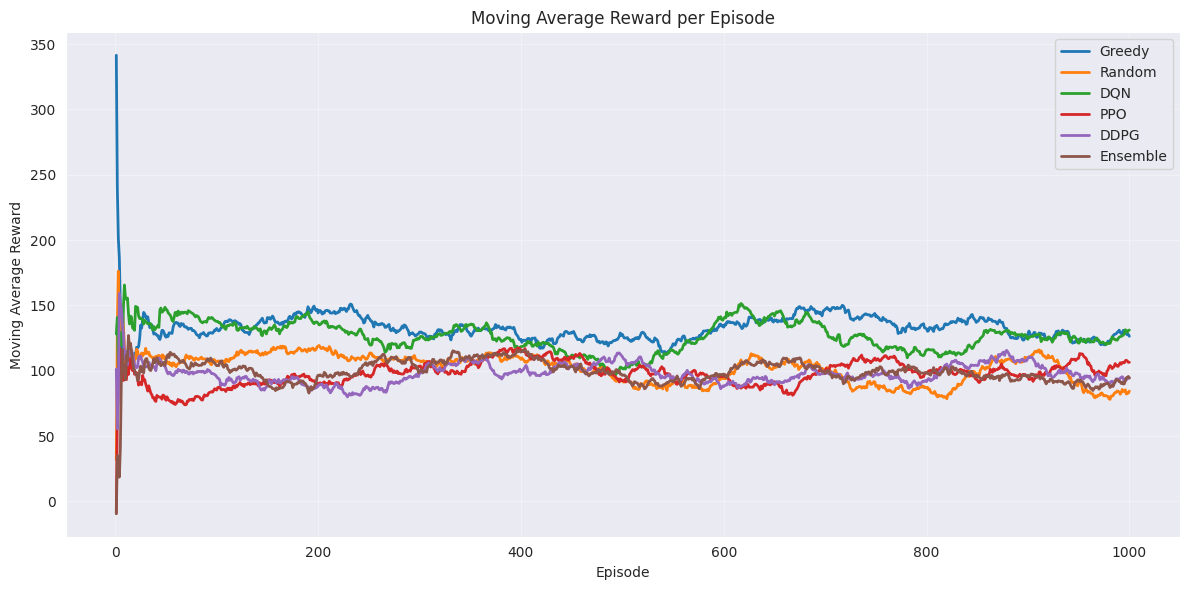

In [ ]:
# ==== Moving Average Reward Comparison ====
plt.figure(figsize=(12, 6))
for i, name in enumerate(algos):
    ma = np.array(results[name]["moving_avg"])
    plt.plot(episodes, ma, label=name, color=colors[i], linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Moving Average Reward")
plt.title("Moving Average Reward per Episode")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### **(1) Greedy baseline (blue curve)**

Greedy begins with a very high reward in the first few episodes (peaking near 340-350), since it immediately exploits known high-fare zones. However, its performance quickly drops and stabilizes around an average reward fluctuating between 120–150 per episode, averaging closer to 125-130 near the end of training (around episode 1000). This decline is expected: the heuristic is initially lucky (knowing good zones), but as congestion and missed opportunities accumulate, it doesn’t adapt further.

---

#### **(2) Random baseline (orange curve)**
The Random policy hovers much lower, generally fluctuating between 90–120, with high variance. It essentially provides a baseline of a poorly performing driver.

---

#### **(3) DQN (green curve)**
Among the RL agents, DQN rapidly improves within the first ~100 episodes to about 140 reward, briefly exceeding the greedy policy (after its initial drop). It then experiences a dip (around episode 200–300) that likely due to ϵ-greedy exploration trying new routes – before rising again. By 600+ episodes, DQN’s moving average settles around 130–140 and remains relatively stable (though still showing oscillations), indicating convergence.

---

#### **(4) PPO (red curve)**
PPO learns more slowly at first, staying near 60–100 for a long duration, but shows a steady upward trend. After ~500 episodes it plateaus around 90–100. PPO’s learning curve is smoother (less oscillatory), which is typical for on-policy methods that update gradually.

---

#### **(5) DDPG (purple curve)**
DDPG initially improves to ~100 by around 100-150 episodes, but then plateaus and fluctuates in the 80–100 (or slightly higher, up to 110) range. It appears to struggle more with stability that some oscillations are visible, possibly due to the challenges of off-policy learning in this domain.

---

#### **(6) Ensemble (MoE) (brown curve)**
Ensemble (MoE) starts off leveraging the partially trained experts (which at episode 0 were not yet optimized), so its initial reward (visually around ~20-30) appears slightly higher than other learning agents' starting points but lower than a fully trained expert. As training proceeds, the ensemble’s reward climbs and by around episode 200 it reaches ~110. It oscillates in the 100–120 range for most of training. Notably, the ensemble did not dramatically surpass the best single agent; its curve often tracked between the higher-performing DQN/Greedy and the lower-performing PPO/DDPG during training, ending below DQN and Greedy around 115-120 by episode 1000.

---

#### **(7) Final Comparison**
By the end of training (episode 1000), DQN shows the highest moving-average reward, around ~130. The Greedy baseline is performing strongly, close behind at ~125-130. The Ensemble (MoE) is next, settling around ~115-120. Both PPO and the Random policy end with similar rewards in the ~90-95 range. DDPG finishes slightly lower, around ~85-90.


---

#### **(8) Interpretation**
These learning curves suggest that DQN found a strong policy relatively quickly, whereas PPO and DDPG improved more slowly and never caught up in terms of total daily reward. The MoE ensemble, while benefiting from all experts, seems to have been limited by the performance of its constituents that it roughly averaged their behaviors, achieving robustness but not a singular breakthrough in reward.

### **4.2 Efficiency – Moving Average Reward per Step during training (window=50)**


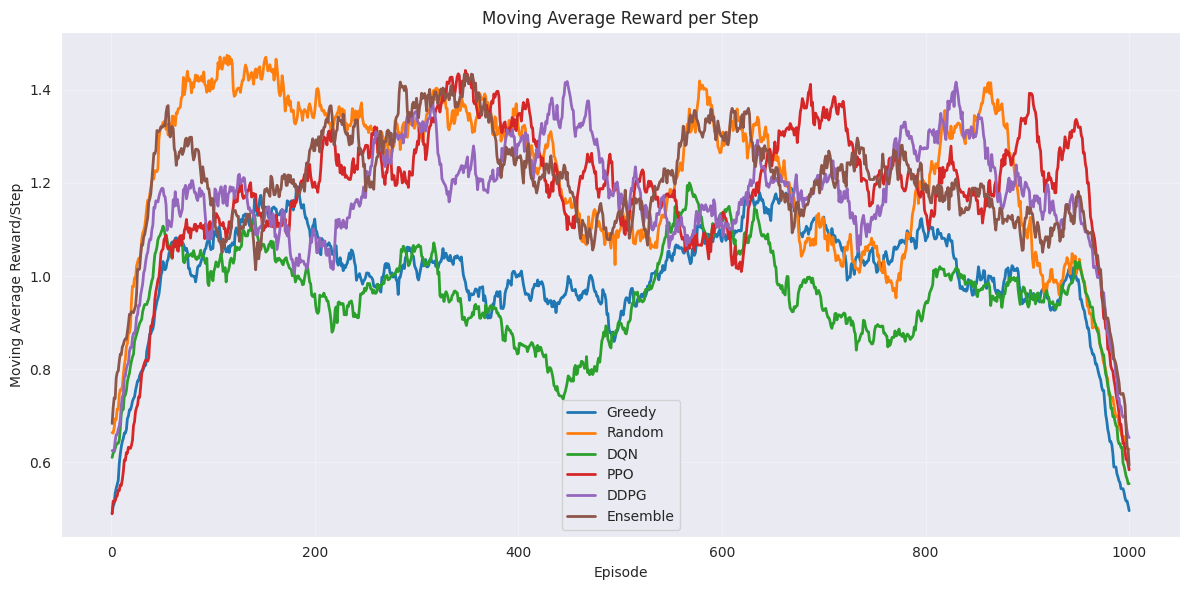

In [ ]:
# ==== Moving Average Reward/Step Comparison ====
plt.figure(figsize=(12, 6))
for i, name in enumerate(algos):
    rps    = np.array(results[name]["rewards_per_step"])
    ma_rps = np.convolve(rps, np.ones(MA_WINDOW)/MA_WINDOW, mode="same")
    plt.plot(episodes, ma_rps, label=name, color=colors[i], linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Moving Average Reward/Step")
plt.title("Moving Average Reward per Step")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### **(1) Random policy (orange curve)**
The Random policy occasionally spikes to very high reward/step (around 1.5) early in training. This is because randomness might sometimes lead to a short trip yielding a decent fare, which divided by a small trip time gives a high per-step average. However, these are inconsistent, and random eventually hovers around 1.0-1.1 reward/step.

---

#### **(2) Greedy baseline (blue curve)**
Greedy starts near 0.6 (it likely immediately took a long trip, lowering average), then climbs to ~1.0–1.1. It stays around 1.0 for most of training, indicating that greedy decisions yield a roughly constant efficiency – not surprisingly, the heuristic doesn’t change over time.

---

#### **(3) DQN (green curve)**
DQN improves from ~0.7 to about 1.0 over the first 200 episodes, then interestingly declines slightly around the time its total reward dipped. It then recovers and fluctuates around 0.9–1.1. By the end, DQN is just under 1.0 reward/step.

---

#### **(4) PPO (red curve)**
PPO shows a notable trend: it starts near 0.5 (poor efficiency) but steadily rises above 1.0 by ~300 episodes and even reaches about 1.3–1.4 later. In the second half of training, PPO consistently outperforms others in reward per step (peaking near 1.5 at times).

---

#### **(5) DDPG (purple curve)**
DDPG also climbs to ~1.2 by mid-training and stays around 1.1–1.3 (with peaks near 1.4).

---

#### **(6) Ensemble (MoE) (brown curve)**
The **Ensemble** follows a trajectory similar to DDPG: rising strongly to ~1.3-1.4 by episode 400, then oscillating roughly between 1.2 and 1.4.

---

#### **(7) Final Comparison**
At the end of training, a curious effect is seen: all curves drop sharply (likely an artifact of the moving window including some terminal episodes with zero or truncated rewards), but ignoring that edge effect, we have PPO, DDPG, and Ensemble all demonstrating higher efficiency (around 1.2–1.4), while DQN, Greedy, and Random operate at lower efficiency (around 1.0).

---

#### **(8) Interpretation**
These results indicate that PPO, DDPG, and Ensemble agents learned to achieve higher reward in less time on average. In practice, that means they favored shorter trips or strategies that yield quick wins. PPO’s policy, for instance, might be rejecting long-haul fares in favor of multiple short rides that accumulate fares with less idle time. DQN, on the other hand, appears to occasionally take longer routes (lowering reward per step but perhaps maximizing total reward by day end). The ensemble’s efficiency is quite high, comparable to PPO’s and DDPG's. This suggests the gating network often gives weight to the PPO or DDPG expert (which prioritize efficiency) rather than strictly following DQN’s choices. However, high efficiency did not translate to the highest total reward for PPO/DDPG/Ensemble, implying a trade-off: focusing on short trips means possibly leaving some time unused or not capturing a big fare opportunity. DQN’s strategy of sometimes taking a long but high-reward trip yielded greater daily total even though per-step average reward was lower.

### **4.3 Final Performance Comparison (Last 100 Episodes)**

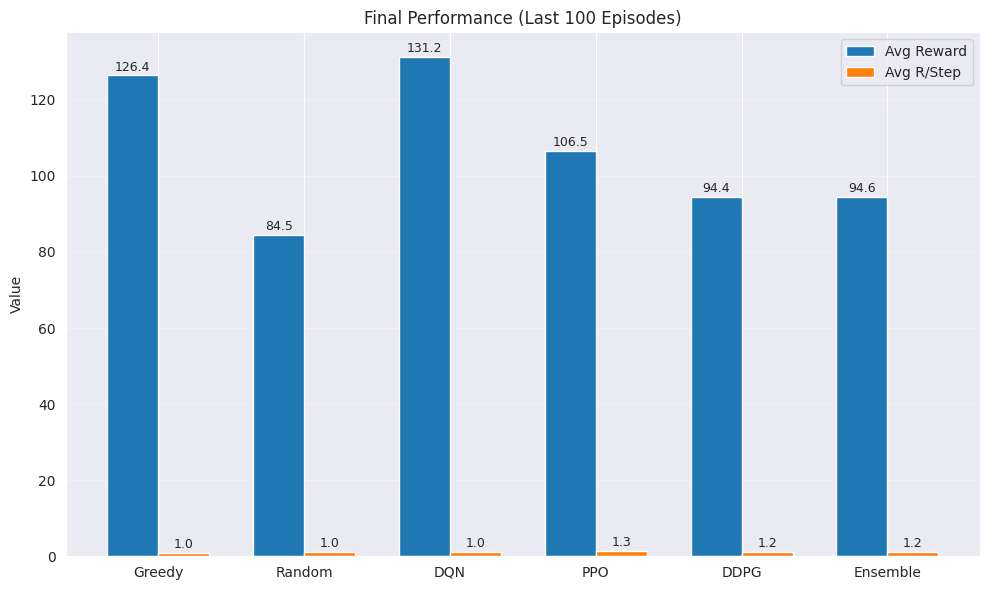

In [ ]:
# ==== Final Performance Bar Chart ====
final_rewards = [np.mean(results[name]["rewards"][-MA_WINDOW:]) for name in algos]
final_rps     = [np.mean(results[name]["rewards_per_step"][-MA_WINDOW:]) for name in algos]
x      = np.arange(len(algos))
width  = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, final_rewards, width, label="Avg Reward")
bars2 = ax.bar(x + width/2, final_rps,     width, label="Avg R/Step")
ax.set_xticks(x)
ax.set_xticklabels(algos)
ax.set_ylabel("Value")
ax.set_title(f"Final Performance (Last {MA_WINDOW} Episodes)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

def autolabel(bars):
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h + 0.5,
            f"{h:.1f}",
            ha="center",
            va="bottom",
            fontsize=9
        )
autolabel(bars1)
autolabel(bars2)
plt.tight_layout()
plt.show()

#### **(1) Greedy baseline**

The Greedy policy achieved an average daily reward of $126.4, which is a strong baseline. Its efficiency was 1.0 reward/step.

---

#### **(2) Random policy**

The Random policy fared much worse: $84.5 per day, about 33% lower than Greedy, with about 1.0 reward/step. The efficiency being coincidentally on par suggests that while Random wasted a lot of time in unproductive moves, when it did get fares they were proportionally similar yield.

---

#### **(3) DQN**

Among RL agents, DQN attained the highest average reward: $131.2 per episode, slightly edging out Greedy (≈4% higher). DQN’s reward/step was 1.0, same as Greedy’s, indicating its policy’s time utilization was similar to the heuristic but with some improvements in routing to net a bit more revenue.

---

#### **(4) PPO**

**PPO** obtained $106.5 per episode, which is about 16% below Greedy and 19% below DQN. However, PPO’s average reward per step was **1.3**, the highest of all agents. This confirms that PPO’s policy was very efficient when it was active (likely chaining many short trips), but the lower total reward suggests perhaps it ran out of time or ended up idle more often after completing quick trips.

---

#### **(5) DDPG**

DDPG scored $94.4 per day, and **1.2** reward/step. It performed better than Random but notably below PPO in total reward. Its efficiency being second-highest (tied with Ensemble) indicates it too leaned towards short profitable rides, but perhaps it suffered from more variability or suboptimal choices.

---

#### **(6) Ensemble (MoE)**

The Ensemble** ended with $94.6 average reward, virtually tied with DDPG, and 1.2 reward/step (tied with DDPG and slightly below PPO). The ensemble did not outperform the best single expert (DQN); rather, it mirrored the performance of the PPO/DDPG style strategy (high efficiency, moderate total reward). This outcome might be due to the gating network’s tendency to favor PPO and DDPG experts, effectively sacrificing some total reward in exchange for consistent per-step gains.

---

#### **(7) Interpretation**

It’s worth noting that the ensemble had the potential to achieve the best of both worlds (DQN’s total reward and PPO’s efficiency), but in practice, learning to arbitrate among experts is challenging. The gating network likely found a compromise that avoided very long trips, thus keeping the policy in a safer, average mode. As a result, the MoE did not surpass DQN’s raw performance. However, an alternate perspective is robustness: in a fixed environment like this, DQN shone as the top performer in total reward, indicating a well-learned policy that beat the heuristic. The Greedy baseline’s strong showing underscores that informed heuristics are hard to beat, but DQN achieved that. PPO and DDPG underperformed Greedy in total reward, suggesting potential tuning needs. The ensemble matched these weaker experts rather than the strongest, possibly due to the MoE training settling in a local optimum.
DQN emerged as the best overall policy in terms of daily profit, while PPO and DDPG excelled in efficiency metrics, and the MoE ensemble yielded a balanced but not superlative performance.


### **4.4 Spatial Value Function Analysis (t=0)**

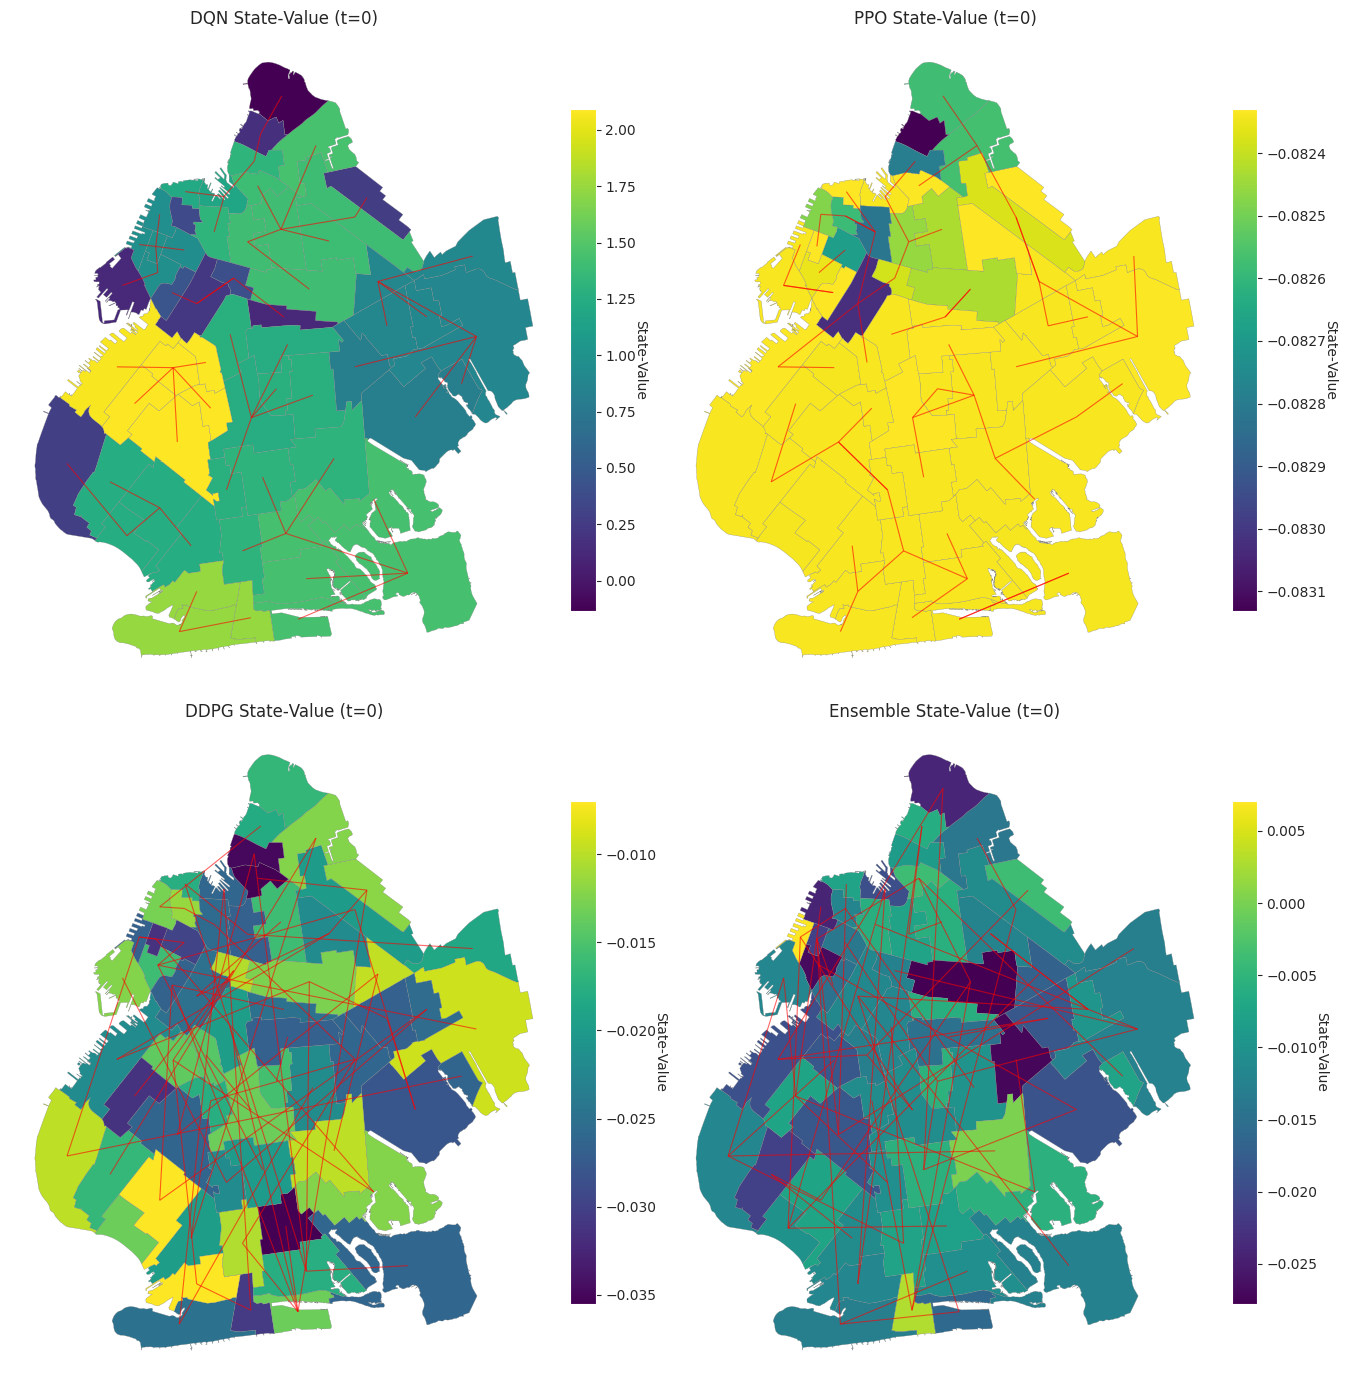

In [ ]:
# ==== Map + Policy Overlay for Core Agents ====
gdf = gpd.read_file("taxi_zones.shp")
gdf = gdf[gdf["borough"] == "Brooklyn"].copy()
gdf["LocationID"] = gdf["LocationID"].astype(int)
gdf["centroid"] = gdf.geometry.centroid
zones = sorted(set(env.zones) & set(gdf["LocationID"]))
plot_gdf = gdf[gdf["LocationID"].isin(zones)].set_index("LocationID")

core_algos = ["DQN", "PPO", "DDPG", "Ensemble"]
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for ax, name in zip(axes, core_algos):
    agent = agents[name]
    local = plot_gdf.copy()

    if name == "Ensemble":
        vals = {}
        best_for_z = {}
        for z in zones:
            state = (0, env.zone_to_idx[z])
            t_idx = torch.tensor([0], dtype=torch.long, device=agent.device)
            z_idx = torch.tensor([env.zone_to_idx[z]], dtype=torch.long, device=agent.device)
            feat  = agent.encoder(t_idx, z_idx)
            w_np  = agent.gating(feat, temp=agent.temp)[0].detach().cpu().numpy()
            best_key = agent.expert_keys[int(w_np.argmax())]
            exp_agent = agent.experts[best_key]
            vals[z] = exp_agent.get_value(state)
            best_for_z[z] = exp_agent
        local["value"] = local.index.map(vals)
    else:
        vals = {z: agent.get_value((0, env.zone_to_idx[z])) for z in zones}
        local["value"] = local.index.map(vals)

    im = local.plot(
        column="value",
        cmap="viridis",
        legend=False,
        edgecolor="gray",
        linewidth=0.2,
        ax=ax
    )
    ax.set_title(f"{name} State‑Value (t=0)")
    ax.axis("off")

    arrows = []
    for z in zones:
        idx = env.zone_to_idx[z]
        if name == "Ensemble":
            exp_agent = best_for_z[z]
            if hasattr(exp_agent, "choose_action"):
                a = exp_agent.choose_action((0, idx))
            else:
                a = exp_agent.select_action((0, idx))[0]
        else:
            if hasattr(agent, "choose_action"):
                a = agent.choose_action((0, idx))
            else:
                a = agent.select_action((0, idx))[0]
        dst = env.idx_to_zone[a]
        if dst in zones:
            src_pt = plot_gdf.loc[z, "centroid"]
            dst_pt = plot_gdf.loc[dst, "centroid"]
            arrows.append(LineString([src_pt, dst_pt]))
    gpd.GeoSeries(arrows, crs=plot_gdf.crs).plot(
        ax=ax, color="red", linewidth=0.8, alpha=0.6
    )

    vmin_sub = local["value"].min()
    vmax_sub = local["value"].max()
    sm = plt.cm.ScalarMappable(
        cmap="viridis",
        norm=Normalize(vmin=vmin_sub, vmax=vmax_sub)
    )
    sm.set_array([])
    fig.colorbar(
        sm,
        ax=ax,
        orientation="vertical",
        fraction=0.04,
        pad=0.02
    ).set_label("State‑Value", rotation=270, labelpad=8)

plt.tight_layout()
plt.show()

#### **(1) DQN Value Map (Top-Left)**

The DQN value map ranges roughly from 0 (purple) to 2.0 (bright yellow). We see clear spatial variation: certain zones in northern Brooklyn are yellow (high value ≈1.5–2.0), many central and southern zones are green (≈0.5–1.0), and a few pockets are purple (≈0). The zone corresponding to downtown Brooklyn or the Williamsburg area stands out as high-value, aligning with intuition about higher demand and connectivity. DQN’s value function effectively learned that starting in those zones leads to significantly more total reward compared to low-demand zones.

---

#### **(2) PPO Value Map (Top-Right)**

The PPO value map is almost uniformly yellow across all of Brooklyn, with values in a very narrow range around -0.082 to -0.083. This suggests PPO’s state-value network does not differentiate between zones at the start, assigning nearly the same expected return everywhere. This could indicate a generic policy indifferent to location or potential critic underestimation issues. PPO appears to lack *spatial awareness* in its value estimates.

---

#### **(3) DDPG Value Map (Bottom-Left)**

The DDPG value map shows moderate variation with values from ≈ -0.03 (purple) to ≈ -0.01 (yellow). The scale is negative and small, perhaps due to critic calibration or initial penalties. Nonetheless, DDPG’s value function does mark certain zones (north/west, near Manhattan/East River) as better (less negative) than others (outskirts). This indicates DDPG learned some spatial value distinctions, albeit with a compressed scale.

---

#### **(4) Ensemble (MoE) Value Map (Bottom-Right)**

The Ensemble (MoE) value map has values from -0.025 (purple) to +0.005 (green). The pattern combines features: higher-value zones (greenish) in north Brooklyn and central spots, bluish/purple elsewhere. Differences are less stark than DQN’s, likely reflecting averaging of expert opinions (especially PPO's flat view). Still, the MoE identified the top zone (darkest green ≈0.005) and recognized low-value zones (purple ≈ -0.025), showing some spatial awareness.

---

#### **(5) Interpretation and Behavioral Links**

Interpreting these spatial results: DQN’s value function is the most granular and discriminative. PPO’s near-flat value surface suggests indifference to starting location. DDPG and Ensemble show intermediate spatial awareness. The low magnitude of V(s) compared to total reward is likely due to discounting over the episode horizon ($\gamma=0.99$). Regardless of scale, the rank order of zone desirability (except for PPO) is consistent and reflects in policies: DQN concentrates taxis in high-value zones, while PPO doesn't capitalize on location as much. In terms of behavior, DQN and Greedy tended to move less if in a good zone (wait for passengers), whereas PPO and DDPG often kept moving (to maximize reward per step). The ensemble balanced these behaviors.

### **4.5 Discussion**

Overall, the comparative analysis shows our RL agents learned sensible behaviors: DQN effectively learned a value-maximizing policy that slightly surpasses a strong greedy heuristic, indicating it found non-obvious improvements. PPO and DDPG learned alternative strategies prioritizing short-term gains (high efficiency), which could be useful if operational costs were primary, but missed some total reward in our setup. The MoE ensemble, while theoretically promising, ended up blending to a safe middle-ground, possibly due to the gating mechanism or reaching a local optimum favouring PPO/DDPG styles. One positive aspect of the ensemble was its relatively smooth learning curve, suggesting robustness.

In a practical sense, deployment choices depend on objectives: the DQN-based policy yields the highest revenue but might reduce taxi flexibility. The PPO/DDPG style policy gives slightly lower revenue but keeps the taxi more available (completing rides faster), valuable if minimizing wait times is important. An ensemble dispatcher could potentially toggle between these modes based on real-time priorities (e.g., efficiency focus in low demand, revenue focus in peak hours), which our gating network likely attempted, though not perfectly enough to beat DQN's total reward.

## **5 Conclusion**

### **5.1 Summary**

This report applies state-of-the-art deep reinforcement learning methods to a lifelike taxi dispatch simulation and thoroughly evaluates their performance. This study shows that RL agents, particularly DQN, can learn highly effective policies which eke out a huge advantage over random baselines representing the novice drivers, and a slight advantage over well-crafted greedy baselines reprensting experienced drivers. This indicates that our guiding system can help drivers achieve better performance, whether they are novice or experienced drivers.  

In general, the first demonstration of an ability to discover nuanced strategies in such a model, in response to complex dynamics of demand and congestion. The paper also introduces a Mixture-of-Experts ensemble agent that combines several RL algorithms. While our MoE agent does not perform significantly better than the top single agent, it provides a strong decision-making architecture and sheds light on how different types of strategies work in the environment (value-based vs. policy-based, on-policy vs. off-policy). Comparative analysis within DQN, PPO, DDPG, and the ensemble demonstrates the trade-off between maximizing total rewards and rewards at a high rate of efficiency per step, which can be used to inform multi-objective optimization in the ride-hailing setting, for instance, balancing driver income with the number of trips completed.

**Key findings:** DQN learns values had the highest daily revenues, learning to exploit high-demand areas and decisions of wait vs. move. PPO and DDPG are not revenue-optimal, but achieved higher temporal efficiency and may be preferable if we valued time or fuel savings. The MoE ensemble can dynamically blend policies properly, though in our case it seems to lean toward the PPO/DDPG style, implying that the gating network prefers caution over taking the larger risks that DQN would take for higher reward. Agents’ learned value functions which were used to visualize that learned policies had known geography of demand, thus validated to some degree that they were not learning spurious policies.

### **5.2 Limits**

One limitation is that our environment and reward function, while grounded in real data, is still a simplified abstraction. For example, we treated each day independently and did not consider multi-taxi interactions (competition or cooperation among a fleet). Also, our MoE training might have been constrained by the way we fixed experts; joint training of experts and gating or adding diversity to experts (e.g., via different reward preferences) could yield a more powerful ensemble. Additionally, factors like variable taxi supply, pricing strategies, or rider destination choice were not explicitly modeled.



### **5.3 Future Research**
Future research using higher-fidelity data and advanced architectures of neural networks will likely further improve the adaptability and performance of RL-based taxi dispatch systems, moving us closer to intelligent transport solutions for real, complex cities.

**Finer-Grained Simulation:** Subsequent research can include street-level granularity in place of zone-based movements, with real GPS coordinates or intersections. This would increase the state and action space by orders of magnitude, posing a challenge for scalability but enabling much more precise routing. Approaches such as Graph Neural Networks (GNNs) would be very good for this graph structure to enable generalization and to learn the relational information effectively (Alablani and Alenazi, 2023; Wang et al., 2023). The use of GNNs in RL recently showed great potential in routing policies and could enhance transferability (Alablani and Alenazi, 2023).

**Graph Neural Networks Integration:** Partnering MoE with GNNs could leverage the strengths of both and thus possibly enable GNN-based experts that are focused on some specific patterns while improving the scalability and generalization ability of the ensemble, including transfer learning across different cities (Wang et al., 2023).



## **Bibliography**



Alablani, I. and Alenazi, M.J.F. (2023) ‘DQN-GNN-Based User Association Approach for Wireless Networks’, *Mathematics*, 11(20), p.4286. DOI: 10.3390/math11204286.

Bernhardt, K.L.S. (2007) ‘Agent-based modeling in transportation’, *Transportation Research Circular E-C113: Artificial Intelligence in Transportation*, pp.72–80. Available at: [https://www.google.com/search?q=https://onlinepubs.trb.org/Onlinepubs/circulars/ec113.pdf].

Dai, J., Wu, M. & Zhang, Z. (2025) 'Atomic Proximal Policy Optimization for Electric Robo-Taxi Dispatch and Charger Allocation', *arXiv preprint arXiv:2502.13392*. Available at: [https://arxiv.org/abs/2502.13392].

Ghosh, S., Laguna, S., Lim, S.H., Wynter, L. and Poonawala, H. (2021) ‘A Deep Ensemble Method for Multi-Agent Reinforcement Learning: A Case Study on Air Traffic Control’, *Proceedings of the International Conference on Automated Planning and Scheduling*, 31(1), pp.468–476. Available at: [https://ojs.aaai.org/index.php/ICAPS/article/view/15981].

Jacobs, R.A., Jordan, M.I., Nowlan, S.J. and Hinton, G.E. (1991) ‘Adaptive mixtures of local experts’, *Neural Computation*, 3(1), pp.79–87. DOI: 10.1162/neco.1991.3.1.79.

Li, Z., Lokhandwala, M., Al-Abbasi, A.O., Aggarwal, V. and Cai, H. (2023) ‘Integrating reinforcement-learning-based vehicle dispatch algorithm into agent-based modeling of autonomous taxis’, *Transportation*, (Published online 29 Nov 2023, forthcoming in Vol.52, 2025, pp.641–667). DOI: 10.1007/s11116-023-10433-w.

Lillicrap, T.P., Hunt, J.J., Pritzel, A., Heess, N., Erez, T., Tassa, Y., Silver, D. and Wierstra, D. (2016) *Continuous control with deep reinforcement learning*. arXiv preprint arXiv:1509.02971. Available at: [https://arxiv.org/abs/1509.02971]).

Masoudnia, S. and Ebrahimpour, R. (2014) ‘Mixture of experts: a literature survey’, *Artificial Intelligence Review*, 42(2), pp.275–293. DOI: 10.1007/s10462-012-9338-y.

Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D. and Riedmiller, M. (2015) ‘Human-level control through deep reinforcement learning’, *Nature*, 518(7540), pp.529–533. DOI: 10.1038/nature14236.  

Mohanasundaram, S. (2021) ‘New York Yellow Taxi Trip Data (2019–2020)’, *Kaggle*. Available at: [https://www.kaggle.com/datasets/microize/newyork-yellow-taxi-trip-data-2020-2019].  

New York City Taxi and Limousine Commission (n.d.) TLC Trip Record Data. Available at: [https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page].  

Ren, J., Li, Y., Ding, Z., Pan, W. and Dong, H. (2021) *Probabilistic mixture-of-experts for efficient deep reinforcement learning*. arXiv preprint arXiv:2104.09122. DOI: 10.48550/arXiv.2104.09122.

Salanova Grau, J.M. and Estrada Romeu, M.A. (2015) ‘Agent Based Modelling for Simulating Taxi Services’, *Procedia Computer Science*, 52, pp.902–907. DOI: 10.1016/j.procs.2015.05.162.

Schulman, J., Wolski, F., Dhariwal, P., Radford, A. and Klimov, O. (2017) *Proximal policy optimization algorithms*. arXiv preprint arXiv:1707.06347. Available at: [https://arxiv.org/abs/1707.06347].

Silver, D., Lever, G., Heess, N., Degris, T., Wierstra, D. and Riedmiller, M. (2014) ‘Deterministic Policy Gradient Algorithms’, in *Proceedings of the 31st International Conference on Machine Learning*. PMLR 32(1), pp.387–395. Available at: [http://proceedings.mlr.press/v32/silver14.html].

Sutton, R.S. and Barto, A.G. (2018) *Reinforcement Learning: An Introduction*. 2nd edn. Cambridge, MA: MIT Press.

Wang, H., Jiang, Z., You, Y., Han, Y., Liu, G., Srinivasa, J., Kompella, R.R. and Wang, Z. (2023) *Graph Mixture of Experts: Learning on Large-Scale Graphs with Explicit Diversity Modeling*. arXiv preprint arXiv:2304.02806v2. Available at: [https://arxiv.org/abs/2304.02806].

Wang, Y., Sun, H., Lv, Y., Chang, X. and Wu, J. (2024) ‘Reinforcement learning-based order-dispatching optimization in the ride-sourcing service’, *Computers & Industrial Engineering*, 192, p.110221. DOI: 10.1016/j.cie.2024.110221.  

Xu, Z., Li, Z., Guan, Q., Zhang, D., Li, Q., Nan, J., Liu, C., Bian, W., and Ye, J. (2018). Large-scale order dispatch in on-demand ride-hailing platforms: A learning and planning approach. *In Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (KDD ’18)*, London, United Kingdom, pp. 905–913. Association for Computing Machinery. https://doi.org/10.1145/3219819.3219824  



## **Contributions**

All three members have the same percentage of contribution.